# Project Description: Metallurgy

In order to optimize production costs, the metallurgical plant "Steel Bird" has decided to reduce electricity consumption during the steel processing stage. To achieve this, the plant needs to control the temperature of the alloy. Our task is to build a model that will predict this temperature. The customer wants to use the developed model for simulating the technological process. Below, we will provide details of this process. It is important to know them before generating new features.

# Processing Stage Description
Steel is processed in a metallic crucible with a capacity of about 100 tons. To withstand high temperatures, the crucible is lined with refractory bricks on the inside. Molten steel is poured into the crucible and heated to the required temperature using graphite electrodes installed in the crucible's lid.

Sulfur is removed from the alloy (this process is desulfurization), the chemical composition is adjusted by adding impurities, and samples are taken. Steel is alloyed—its composition is altered—by introducing pieces of the alloy from a bunker for bulk materials or wire through a special tribe apparatus (from the English "tribe" meaning "mass").

Before introducing alloying additives for the first time, the temperature of the steel is measured, and its chemical analysis is performed. The temperature is then raised for a few minutes, alloying materials are added, and the alloy is blown with inert gas. It is then stirred, and measurements are taken again. This cycle is repeated until the target chemical composition and optimal melting temperature are achieved.

The molten steel is then sent for metal finishing or enters the continuous casting machine. The final product emerges from there in the form of slabs.

Data Description:

The data consists of several files obtained from different sources:

- data_arc_new.csv — data about electrodes;
- data_bulk_new.csv — data about the supply of bulk materials (volume);
- data_bulk_time_new.csv — data about the supply of bulk materials (time);
- data_gas_new.csv — data about blowing the alloy with gas;
- data_temp_new.csv — results of temperature measurements;
- data_wire_new.csv — data about wire materials (volume);
- data_wire_time_new.csv — data about wire materials (time).

File data_arc_new.csv

- key — batch number;
- Start of arc heating — start time of arc heating;
- End of arc heating — end time of arc heating;
- Active power — active power value;
- Reactive power — reactive power value.

File data_bulk_new.csv

- key — batch number;
- Bulk 1 … Bulk 15 — volume of the supplied material.

File data_bulk_time_new.csv

- key — batch number;
- Bulk 1 … Bulk 15 — time of material supply.

File data_gas_new.csv

- key — batch number;
- Gas 1 — volume of the supplied gas.

File data_temp_new.csv

- key — batch number;
- Measurement time — measurement time;
- Temperature — temperature value.

File data_wire_new.csv

- key — batch number;
- Wire 1 … Wire 15 — volume of the supplied wire materials.

File data_wire_time_new.csv

- key — batch number;
- Wire 1 … Wire 15 — time of wire material supply.

In all files, the 'key' column contains the batch number. There may be multiple rows with the same key value in the files, corresponding to different processing iterations.

# Work Plan

- Step 1. Data Loading

Load the data and perform an initial exploration.

- Step 2. Exploratory Data Analysis and Data Preprocessing

Conduct exploratory analysis for each dataframe and preprocess if necessary. Draw conclusions about the features: whether they are needed for model training.

- Step 3. Data Integration

Combine selected features into one dataframe using a key.

- Step 4. Exploratory Data Analysis and Preprocessing of the Merged Dataframe

Perform exploratory analysis on the merged dataframe, visualize feature distributions, and preprocess if necessary. Conduct a correlation analysis. New features may be generated if needed.

- Step 5. Data Preparation

Prepare the data for model training. Split the data into two sets, considering the data and model characteristics during scaling and encoding.

- Step 6. Machine Learning Model Training

Train three models: Linear Regression, Random Forest, and CatBoost. Tune optimal hyperparameters for each.

- Step 7. Selecting the Best Model

Choose the best model and evaluate its performance on the test set.

- Step 8. Overall Conclusion and Recommendations to the Customer

Provide an overall conclusion about the work done, describe the main stages, present the results obtained, and offer business recommendations.

## Data Loading

Import all the necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from tqdm import tqdm

Загрузим данные из датасетов.

In [2]:
data_arc_new = pd.read_csv('/Users/daniyardjumaliev/Jupyter/Projects/datasets/data_arc_new.csv')
data_bulk_new = pd.read_csv('/Users/daniyardjumaliev/Jupyter/Projects/datasets/data_bulk_new.csv')
data_bulk_time_new = pd.read_csv('/Users/daniyardjumaliev/Jupyter/Projects/datasets/data_bulk_time_new.csv')
data_gas_new = pd.read_csv('/Users/daniyardjumaliev/Jupyter/Projects/datasets/data_gas_new.csv')
data_temp_new = pd.read_csv('/Users/daniyardjumaliev/Jupyter/Projects/datasets/data_temp_new.csv')
data_wire_new = pd.read_csv('/Users/daniyardjumaliev/Jupyter/Projects/datasets/data_wire_new.csv')
data_wire_time_new = pd.read_csv('/Users/daniyardjumaliev/Jupyter/Projects/datasets/data_wire_time_new.csv')

## Exploratory Data Analysis and Data Preprocessing

Check the loaded datasets for missing values, duplicates, and other anomalies.

In [3]:
display('---------Data Arc New-----------')
display(data_arc_new.head(10))
display(data_arc_new.tail(10))
display(data_arc_new.describe())
data_arc_new.info()
display(f'Duplicates: {data_arc_new.duplicated().sum()}')
display(f'Missing values:')
display(data_arc_new.isna().sum())

'---------Data Arc New-----------'

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.381124,0.220351
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,0.261665,0.205527
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.710297,0.484962
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.786322,0.542517
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.101678,0.820856


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
14866,3240,2019-09-06 15:25:31,2019-09-06 15:27:32,0.669469,0.497374
14867,3240,2019-09-06 15:31:02,2019-09-06 15:33:35,0.566284,0.380893
14868,3240,2019-09-06 15:58:45,2019-09-06 16:01:15,0.382519,0.232164
14869,3240,2019-09-06 16:02:41,2019-09-06 16:07:15,0.496953,0.416185
14870,3240,2019-09-06 16:21:54,2019-09-06 16:24:15,1.202454,0.846936
14871,3241,2019-09-06 16:49:05,2019-09-06 16:51:42,0.439735,0.299579
14872,3241,2019-09-06 16:55:11,2019-09-06 16:58:11,0.646498,0.458240
14873,3241,2019-09-06 17:06:48,2019-09-06 17:09:52,1.039726,0.769302
14874,3241,2019-09-06 17:21:58,2019-09-06 17:22:55,0.530267,0.361543
14875,3241,2019-09-06 17:24:54,2019-09-06 17:26:15,0.389057,0.251347


,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


'Duplicates: 0'

'Missing values:'

key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

The data in the data_arc_new dataset does not contain missing values or explicit duplicates. Let's convert the cells with date and time to the datetime64 format. Additionally, we will check the "reactive power" column for outliers.

In [4]:
data_arc_new['Начало нагрева дугой'] = pd.to_datetime(data_arc_new['Начало нагрева дугой'])
data_arc_new['Конец нагрева дугой'] = pd.to_datetime(data_arc_new['Конец нагрева дугой'])

data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  float64       
 4   Реактивная мощность   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


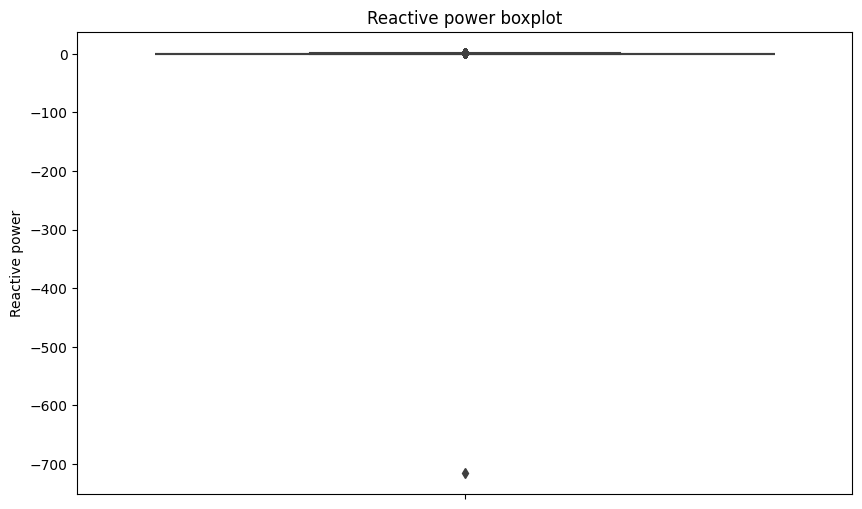

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Реактивная мощность', data=data_arc_new)
plt.title('Reactive power boxplot')
plt.ylabel('Reactive power')
plt.show()

Judging by the boxplot, there is only one row with an outlier of -715 in the "Reactive Power" column. Let's remove this batch.

In [6]:
outlier_key = data_arc_new[data_arc_new['Реактивная мощность'] == -715.479924]['key'].values[0]
print("Key with outlier -715.479924:", outlier_key)

Key with outlier -715.479924: 2116


Remove all rows for 'key' = 2116

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


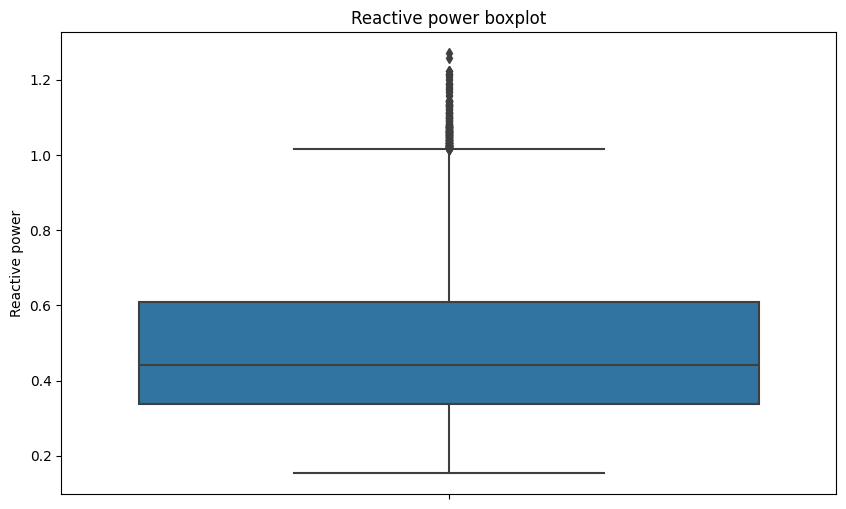

In [7]:
data_arc_new = data_arc_new[data_arc_new['key'] != 2116]

plt.figure(figsize=(10, 6))
sns.boxplot(y='Реактивная мощность', data=data_arc_new)
plt.title('Reactive power boxplot')
plt.ylabel('Reactive power')
plt.show()

In [8]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14872 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14872 non-null  int64         
 1   Начало нагрева дугой  14872 non-null  datetime64[ns]
 2   Конец нагрева дугой   14872 non-null  datetime64[ns]
 3   Активная мощность     14872 non-null  float64       
 4   Реактивная мощность   14872 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 697.1 KB


To avoid any future issues with Cyrillic characters in column names, let's assign them English names.

In [9]:
data_arc_new = data_arc_new.rename(columns={
    'Начало нагрева дугой': 'Start of arc heating',
    'Конец нагрева дугой': 'End of arc heating',
    'Активная мощность': 'Active power',
    'Реактивная мощность': 'Reactive power'
})

display(data_arc_new.head(10))
display(data_arc_new.tail(10))

,key,Start of arc heating,End of arc heating,Active power,Reactive power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.381124,0.220351
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,0.261665,0.205527
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.710297,0.484962
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.786322,0.542517
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.101678,0.820856


,key,Start of arc heating,End of arc heating,Active power,Reactive power
14866,3240,2019-09-06 15:25:31,2019-09-06 15:27:32,0.669469,0.497374
14867,3240,2019-09-06 15:31:02,2019-09-06 15:33:35,0.566284,0.380893
14868,3240,2019-09-06 15:58:45,2019-09-06 16:01:15,0.382519,0.232164
14869,3240,2019-09-06 16:02:41,2019-09-06 16:07:15,0.496953,0.416185
14870,3240,2019-09-06 16:21:54,2019-09-06 16:24:15,1.202454,0.846936
14871,3241,2019-09-06 16:49:05,2019-09-06 16:51:42,0.439735,0.299579
14872,3241,2019-09-06 16:55:11,2019-09-06 16:58:11,0.646498,0.458240
14873,3241,2019-09-06 17:06:48,2019-09-06 17:09:52,1.039726,0.769302
14874,3241,2019-09-06 17:21:58,2019-09-06 17:22:55,0.530267,0.361543
14875,3241,2019-09-06 17:24:54,2019-09-06 17:26:15,0.389057,0.251347


In [10]:
display(data_arc_new['Start of arc heating'].min())
display(data_arc_new['Start of arc heating'].max())
display(data_arc_new['End of arc heating'].min())
display(data_arc_new['End of arc heating'].max())

Timestamp('2019-05-03 11:02:14')

Timestamp('2019-09-06 17:24:54')

Timestamp('2019-05-03 11:06:02')

Timestamp('2019-09-06 17:26:15')

_Conclusion_: The key with an outlier of -715 in the reactive power column was removed from the "key" in the data_arc_new dataset. The columns with date and time were converted to the datetime format. After these initial transformations, the data_arc_new table is ready for further aggregation and integration into the overall final table.

In [11]:
display('---------Data Bulk New-----------')
display(data_bulk_new.head(10))
display(data_bulk_new.tail(10))
display(data_bulk_new.describe())
data_bulk_new.info()
display(f'Duplicates: {data_bulk_new.duplicated().sum()}')
display(f'Missing values:')
display(data_bulk_new.isna().sum())

'---------Data Bulk New-----------'

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
5,6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,201.0,154.0
6,7,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,154.0
7,8,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,252.0,153.0
8,9,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,99.0,203.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,102.0,204.0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
3119,3232,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,92.0,204.0
3120,3233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,114.0,204.0
3121,3234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262.0,204.0
3122,3235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,118.0,206.0
3123,3236,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.0,NaN,132.0,208.0
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0
3128,3241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,52.0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


'Duplicates: 0'

'Missing values:'

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

As seen in the data_bulk_new dataset, many values are missing. However, this is not an error but likely due to the fact that not the entire list of bulk materials is added at each stage. Therefore, it would be logical to replace all missing values with zeros (0.0).

In [12]:
data_bulk_new.fillna(0.0, inplace=True)

display(data_bulk_new.head(10))

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0
5,6,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,204.0,0.0,201.0,154.0
6,7,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,204.0,0.0,152.0,154.0
7,8,0.0,0.0,0.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,410.0,0.0,252.0,153.0
8,9,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.0,0.0,99.0,203.0
9,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,102.0,204.0


_Conclusion_: All missing values have been replaced with 0.0.

In [13]:
display('---------Data Bulk Time New-----------')
display(data_bulk_time_new.head(10))
display(data_bulk_time_new.tail(10))
display(data_bulk_time_new.describe())
data_bulk_time_new.info()
display(f'Duplicates: {data_bulk_time_new.duplicated().sum()}')
display(f'Missing values:')
display(data_bulk_time_new.isna().sum())

'---------Data Bulk Time New-----------'

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47
5,6,NaN,NaN,NaN,2019-05-03 13:57:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:48:52,NaN,2019-05-03 14:09:42,2019-05-03 14:03:15
6,7,NaN,NaN,NaN,2019-05-03 14:18:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:41:26,NaN,2019-05-03 14:30:50,2019-05-03 14:27:16
7,8,NaN,NaN,NaN,2019-05-03 15:17:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 15:17:58,NaN,2019-05-03 15:13:18,2019-05-03 15:05:33
8,9,NaN,NaN,NaN,2019-05-03 16:03:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:03:08,NaN,2019-05-03 16:00:16,2019-05-03 15:52:39
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:38:11,NaN,2019-05-03 16:34:24,2019-05-03 16:29:56


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
3119,3232,NaN,NaN,2019-09-06 08:43:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 08:59:18,NaN,2019-09-06 08:54:41,2019-09-06 08:50:40
3120,3233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 09:18:31,NaN,2019-09-06 09:35:02,2019-09-06 09:24:13
3121,3234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 09:51:25,2019-09-06 09:51:25
3122,3235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 10:50:02,NaN,2019-09-06 10:38:19,2019-09-06 10:25:39
3123,3236,NaN,NaN,2019-09-06 11:04:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 11:04:20,NaN,2019-09-06 11:04:20,2019-09-06 11:04:20
3124,3237,NaN,NaN,2019-09-06 11:54:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 11:49:45,NaN,2019-09-06 11:45:22,2019-09-06 11:40:06
3125,3238,NaN,NaN,2019-09-06 12:26:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 12:18:35,NaN,2019-09-06 12:31:49,2019-09-06 12:26:52
3126,3239,NaN,NaN,NaN,NaN,NaN,2019-09-06 15:06:00,NaN,NaN,NaN,NaN,NaN,2019-09-06 15:01:44,NaN,2019-09-06 14:58:15,2019-09-06 14:48:06
3127,3240,NaN,NaN,NaN,NaN,NaN,2019-09-06 16:24:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 16:07:29,2019-09-06 16:01:34
3128,3241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 17:26:33,2019-09-06 17:23:15


,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


'Duplicates: 0'

'Missing values:'

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

In [14]:
bulk_columns = data_bulk_time_new.columns[data_bulk_time_new.columns.str.startswith('Bulk')]

for column in bulk_columns:
    data_bulk_time_new[column] = pd.to_datetime(data_bulk_time_new[column], errors='coerce')

data_bulk_time_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   Bulk 1   252 non-null    datetime64[ns]
 2   Bulk 2   22 non-null     datetime64[ns]
 3   Bulk 3   1298 non-null   datetime64[ns]
 4   Bulk 4   1014 non-null   datetime64[ns]
 5   Bulk 5   77 non-null     datetime64[ns]
 6   Bulk 6   576 non-null    datetime64[ns]
 7   Bulk 7   25 non-null     datetime64[ns]
 8   Bulk 8   1 non-null      datetime64[ns]
 9   Bulk 9   19 non-null     datetime64[ns]
 10  Bulk 10  176 non-null    datetime64[ns]
 11  Bulk 11  177 non-null    datetime64[ns]
 12  Bulk 12  2450 non-null   datetime64[ns]
 13  Bulk 13  18 non-null     datetime64[ns]
 14  Bulk 14  2806 non-null   datetime64[ns]
 15  Bulk 15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.2 KB


In [15]:
bulk_columns = data_bulk_time_new.columns[data_bulk_time_new.columns.str.startswith('Bulk')]

for column in bulk_columns:
    display(f'min = {data_bulk_time_new[column].min()}')
    display(f'max = {data_bulk_time_new[column].max()}')
    print()

'min = 2019-05-03 17:42:46'

'max = 2019-09-05 09:11:32'

'min = 2019-05-07 15:39:35'

'max = 2019-08-13 11:47:39'

'min = 2019-05-03 20:40:25'

'max = 2019-09-06 12:26:52'

'min = 2019-05-03 11:28:48'

'max = 2019-09-05 03:35:21'

'min = 2019-05-07 15:19:17'

'max = 2019-09-02 18:16:52'

'min = 2019-05-03 19:09:15'

'max = 2019-09-06 16:24:28'

'min = 2019-05-07 18:11:01'

'max = 2019-09-05 19:07:49'

'min = 2019-07-08 17:14:53'

'max = 2019-07-08 17:14:53'

'min = 2019-05-14 11:57:58'

'max = 2019-08-16 09:11:56'

'min = 2019-05-06 07:54:02'

'max = 2019-09-04 10:03:22'

'min = 2019-05-05 23:43:24'

'max = 2019-09-06 05:03:14'

'min = 2019-05-03 11:24:31'

'max = 2019-09-06 15:01:44'

'min = 2019-05-05 02:10:21'

'max = 2019-09-01 01:53:02'

'min = 2019-05-03 11:14:50'

'max = 2019-09-06 17:26:33'

'min = 2019-05-03 11:10:43'

'max = 2019-09-06 17:23:15'

_Conclusion_: The data_bulk_time_new table may not be needed for the future final table, as it naturally contains the time of adding specific bulk materials to the alloy. It is assumed that only the dates and times from the data_arc_new table, aggregated by 'key' without considering iterations, will be included in the future final table. The volumes of bulk materials will also be combined based on the 'key' column. However, the format has been changed to datetime in case it is needed in this table.

In [16]:
display('---------Data Gas New-----------')
display(data_gas_new.head(10))
display(data_gas_new.tail(10))
display(data_gas_new.describe())
data_gas_new.info()
display(f'Duplicates: {data_gas_new.duplicated().sum()}')
display(f'Missing values:')
display(data_gas_new.isna().sum())

'---------Data Gas New-----------'

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
5,6,11.273392
6,7,9.836267
7,8,15.171553
8,9,8.216623
9,10,6.529891


,key,Газ 1
3229,3232,8.630453
3230,3233,7.366606
3231,3234,9.110702
3232,3235,5.710729
3233,3236,6.958647
3234,3237,5.543905
3235,3238,6.745669
3236,3239,16.023518
3237,3240,11.863103
3238,3241,12.680959


,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


'Duplicates: 0'

'Missing values:'

key      0
Газ 1    0
dtype: int64

Let's rename the column using Latin characters.

In [17]:
data_gas_new = data_gas_new.rename(columns={'Газ 1': 'Gas 1'})

display(data_gas_new.head(10))
display(data_gas_new.tail(10))

,key,Gas 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
5,6,11.273392
6,7,9.836267
7,8,15.171553
8,9,8.216623
9,10,6.529891


,key,Gas 1
3229,3232,8.630453
3230,3233,7.366606
3231,3234,9.110702
3232,3235,5.710729
3233,3236,6.958647
3234,3237,5.543905
3235,3238,6.745669
3236,3239,16.023518
3237,3240,11.863103
3238,3241,12.680959


_Conclusion_: The table with gas blowing does not exhibit significant outliers or other anomalies.

In [18]:
display('---------Data Temp New-----------')
display(data_temp_new.head(10))
display(data_temp_new.tail(10))
display(data_temp_new.describe())
data_temp_new.info()
display(f'Duplicates: {data_temp_new.duplicated().sum()}')
display(f'Missing values:')
display(data_temp_new.isna().sum())

'---------Data Temp New-----------'

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
5,1,2019-05-03 11:30:38,1613.0
6,2,2019-05-03 11:34:04,1581.0
7,2,2019-05-03 11:38:40,1577.0
8,2,2019-05-03 11:46:09,1589.0
9,2,2019-05-03 11:49:38,1604.0


,key,Время замера,Температура
18082,3240,2019-09-06 15:58:35,NaN
18083,3240,2019-09-06 16:02:31,NaN
18084,3240,2019-09-06 16:21:44,NaN
18085,3240,2019-09-06 16:35:26,NaN
18086,3241,2019-09-06 16:48:55,1586.0
18087,3241,2019-09-06 16:55:01,NaN
18088,3241,2019-09-06 17:06:38,NaN
18089,3241,2019-09-06 17:21:48,NaN
18090,3241,2019-09-06 17:24:44,NaN
18091,3241,2019-09-06 17:30:05,NaN


,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


'Duplicates: 0'

'Missing values:'

key                0
Время замера       0
Температура     3427
dtype: int64

Let's remove all rows based on 'key' where at least one temperature value is missing. Additionally, we'll remove all values below 1400 degrees, as per the steel melting technology, steel begins the crystallization process below this temperature.

In [19]:
keys_with_nan = data_temp_new.loc[data_temp_new['Температура'].isna(), 'key'].unique()
data_temp_new = data_temp_new[~data_temp_new['key'].isin(keys_with_nan)]

data_temp_new = data_temp_new.groupby('key').filter(lambda x: (x['Температура'] >= 1400).all())

display(data_temp_new.head(10))
display(data_temp_new.tail(10))
data_temp_new.info()
display(data_temp_new.describe())
display(f'Missing values:')
display(data_temp_new.isna().sum())

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
5,1,2019-05-03 11:30:38,1613.0
6,2,2019-05-03 11:34:04,1581.0
7,2,2019-05-03 11:38:40,1577.0
8,2,2019-05-03 11:46:09,1589.0
9,2,2019-05-03 11:49:38,1604.0


,key,Время замера,Температура
13916,2498,2019-08-10 13:05:03,1570.0
13917,2498,2019-08-10 13:08:23,1580.0
13918,2498,2019-08-10 13:12:49,1593.0
13919,2498,2019-08-10 13:20:08,1582.0
13920,2498,2019-08-10 13:23:31,1594.0
13921,2499,2019-08-10 13:33:21,1569.0
13922,2499,2019-08-10 13:41:34,1604.0
13923,2499,2019-08-10 13:46:28,1593.0
13924,2499,2019-08-10 13:54:56,1588.0
13925,2499,2019-08-10 13:58:58,1603.0


<class 'pandas.core.frame.DataFrame'>
Index: 13905 entries, 0 to 13925
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           13905 non-null  int64  
 1   Время замера  13905 non-null  object 
 2   Температура   13905 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 434.5+ KB


,key,Температура
count,13905.00000,13905.000000
mean,1243.32571,1590.924847
std,719.39552,18.750314
min,1.00000,1519.000000
25%,623.00000,1580.000000
50%,1246.00000,1590.000000
75%,1870.00000,1599.000000
max,2499.00000,1705.000000


'Missing values:'

key             0
Время замера    0
Температура     0
dtype: int64

As usual, let's replace all Cyrillic column names with Latin characters, and also convert the measurement time column to the datetime format.

In [20]:
data_temp_new['Время замера'] = pd.to_datetime(data_temp_new['Время замера'])
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13905 entries, 0 to 13925
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           13905 non-null  int64         
 1   Время замера  13905 non-null  datetime64[ns]
 2   Температура   13905 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 434.5 KB


In [21]:
data_temp_new = data_temp_new.rename(columns={'Время замера': 'Measurement time', 'Температура': 'Temp'})

display(data_temp_new.head(10))
display(data_temp_new.tail(10))

,key,Measurement time,Temp
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
5,1,2019-05-03 11:30:38,1613.0
6,2,2019-05-03 11:34:04,1581.0
7,2,2019-05-03 11:38:40,1577.0
8,2,2019-05-03 11:46:09,1589.0
9,2,2019-05-03 11:49:38,1604.0


,key,Measurement time,Temp
13916,2498,2019-08-10 13:05:03,1570.0
13917,2498,2019-08-10 13:08:23,1580.0
13918,2498,2019-08-10 13:12:49,1593.0
13919,2498,2019-08-10 13:20:08,1582.0
13920,2498,2019-08-10 13:23:31,1594.0
13921,2499,2019-08-10 13:33:21,1569.0
13922,2499,2019-08-10 13:41:34,1604.0
13923,2499,2019-08-10 13:46:28,1593.0
13924,2499,2019-08-10 13:54:56,1588.0
13925,2499,2019-08-10 13:58:58,1603.0


_Conclusion_: All 'key' entries with at least one missing value in the temperature column were removed, as well as all values below 1400 degrees.

In [22]:
display('---------Data Wire New-----------')
display(data_wire_new.head(10))
display(data_wire_new.tail(10))
display(data_wire_new.describe())
data_wire_new.info()
display(f'Duplicates: {data_wire_new.duplicated().sum()}')
display(f'Missing values:')
display(data_wire_new.isna().sum())

'---------Data Wire New-----------'

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.109917,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,98.061600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,155.282394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,113.393279,9.143681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,81.244796,12.376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
3071,3232,15.069600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3072,3233,107.147033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3073,3234,110.160957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3074,3235,125.099525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3075,3236,101.162880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3076,3237,38.088959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,56.128799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,143.357761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,34.070400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3080,3241,63.117595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


'Duplicates: 0'

'Missing values:'

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

Let's replace all missing values with zeros.

In [23]:
data_wire_new.fillna(0.0, inplace=True)

display(data_wire_new.head(10))

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,91.160157,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,89.063515,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,89.238236,9.114560,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,99.109917,9.114560,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,98.061600,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,155.282394,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,113.393279,9.143681,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,81.244796,12.376000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


_Conclusion_: All missing values have been replaced with zeros.

In [24]:
display('---------Data Wire Time New-----------')
display(data_wire_time_new.head(10))
display(data_wire_time_new.tail(10))
display(data_wire_time_new.describe())
data_wire_time_new.info()
display(f'Duplicates: {data_wire_time_new.duplicated().sum()}')
display(f'Missing values:')
display(data_wire_time_new.isna().sum())

'---------Data Wire Time New-----------'

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2019-05-03 13:57:27,2019-05-03 13:48:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2019-05-03 14:18:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2019-05-03 15:01:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2019-05-03 15:45:44,2019-05-03 15:39:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2019-05-03 16:27:00,2019-05-03 16:22:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
3071,3232,2019-09-06 08:43:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3072,3233,2019-09-06 09:18:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3073,3234,2019-09-06 09:43:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3074,3235,2019-09-06 10:21:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3075,3236,2019-09-06 10:57:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3076,3237,2019-09-06 11:33:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,2019-09-06 12:18:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,2019-09-06 14:36:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,2019-09-06 15:33:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3080,3241,2019-09-06 17:10:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


'Duplicates: 0'

'Missing values:'

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

Let's convert all columns to the datetime format.

In [25]:
wire_columns = data_wire_time_new.columns[data_wire_time_new.columns.str.startswith('Wire')]

for column in wire_columns:
    data_wire_time_new[column] = pd.to_datetime(data_wire_time_new[column], errors='coerce')

data_wire_time_new.info()
display(data_wire_time_new.head(10))
display(data_wire_time_new.tail(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   Wire 1  3055 non-null   datetime64[ns]
 2   Wire 2  1079 non-null   datetime64[ns]
 3   Wire 3  63 non-null     datetime64[ns]
 4   Wire 4  14 non-null     datetime64[ns]
 5   Wire 5  1 non-null      datetime64[ns]
 6   Wire 6  73 non-null     datetime64[ns]
 7   Wire 7  11 non-null     datetime64[ns]
 8   Wire 8  19 non-null     datetime64[ns]
 9   Wire 9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2019-05-03 12:11:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaT,NaT,NaT,NaT,NaT,NaT,NaT
5,6,2019-05-03 13:57:27,2019-05-03 13:48:52,NaT,NaT,NaT,NaT,NaT,NaT,NaT
6,7,2019-05-03 14:18:58,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
7,8,2019-05-03 15:01:30,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
8,9,2019-05-03 15:45:44,2019-05-03 15:39:37,NaT,NaT,NaT,NaT,NaT,NaT,NaT
9,10,2019-05-03 16:27:00,2019-05-03 16:22:36,NaT,NaT,NaT,NaT,NaT,NaT,NaT


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
3071,3232,2019-09-06 08:43:49,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3072,3233,2019-09-06 09:18:31,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3073,3234,2019-09-06 09:43:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3074,3235,2019-09-06 10:21:23,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3075,3236,2019-09-06 10:57:48,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3076,3237,2019-09-06 11:33:38,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3077,3238,2019-09-06 12:18:35,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3078,3239,2019-09-06 14:36:11,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3079,3240,2019-09-06 15:33:55,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3080,3241,2019-09-06 17:10:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [26]:
wire_columns = data_wire_time_new.columns[data_wire_time_new.columns.str.startswith('Wire')]

for column in wire_columns:
    display(f'min = {data_wire_time_new[column].min()}')
    display(f'max = {data_wire_time_new[column].max()}')
    print()

'min = 2019-05-03 11:06:19'

'max = 2019-09-06 17:10:06'

'min = 2019-05-03 13:15:34'

'max = 2019-09-06 07:35:40'

'min = 2019-05-04 04:34:27'

'max = 2019-09-02 07:14:44'

'min = 2019-05-07 15:19:17'

'max = 2019-08-13 03:16:45'

'min = 2019-08-13 06:14:30'

'max = 2019-08-13 06:14:30'

'min = 2019-05-07 14:46:05'

'max = 2019-08-18 19:10:56'

'min = 2019-07-27 05:49:05'

'max = 2019-08-13 10:25:22'

'min = 2019-05-14 11:29:24'

'max = 2019-08-16 08:56:23'

'min = 2019-05-04 17:21:27'

'max = 2019-09-03 12:55:23'

_Conclusion_: Dates in the data_wire_time_new table have been converted to the datetime format.

_Conclusion on Data Analysis and Preprocessing_: In all dataframes, missing values were removed, date columns were converted to the datetime format, and column names were changed to Latin characters.

## Data Integration

Before combining the data, let's prepare the features in each table and standardize them for easier data integration.

Firstly, let's determine the target variable - temperature. We will train the model on the initial temperature to predict the final temperature. Such a model should account for the optimal temperature and consider the general trend and variability of temperatures during the heating process, which can be useful for achieving a balance between efficiency and equipment wear.

Let's combine the data in the data_temp_new table. Instead of the date, we will calculate the duration of the ladle heating, and in the temperature column, we will display the initial and final temperatures for each ladle.

In [27]:
temp = data_temp_new.groupby('key').agg(
    Start_Temp=('Temp', 'first'),
    End_Temp=('Temp', 'last'),
    Duration_Temp=('Measurement time', lambda x: (x.max() - x.min()).total_seconds())
).reset_index()

display(temp)

,key,Start_Temp,End_Temp,Duration_Temp
0,1,1571.0,1613.0,1714.0
1,2,1581.0,1602.0,1265.0
2,3,1596.0,1599.0,1753.0
3,4,1601.0,1625.0,1220.0
4,5,1576.0,1602.0,1536.0
...,...,...,...,...
2468,2495,1570.0,1591.0,1380.0
2469,2496,1554.0,1591.0,1705.0
2470,2497,1571.0,1589.0,962.0
2471,2498,1591.0,1594.0,1520.0


Now, let's aggregate the data_arc_new dataframe. We will calculate the duration for each ladle, display the average values of active and reactive power, and add a new column with the total power value.

In [28]:
data_arc_new['Duration'] = (data_arc_new['End of arc heating'] - data_arc_new['Start of arc heating']).dt.total_seconds()

arc = data_arc_new.groupby('key').agg(
    Duration_arc = ('Duration', 'sum'),
    Avg_Active_Power = ('Active power', 'mean'),
    Avg_Reactive_Power = ('Reactive power', 'mean')
).reset_index()

display(arc)

,key,Duration_arc,Avg_Active_Power,Avg_Reactive_Power
0,1,1098.0,0.607346,0.428564
1,2,811.0,0.534852,0.363339
2,3,655.0,0.812728,0.587491
3,4,741.0,0.676622,0.514248
4,5,869.0,0.563238,0.421998
...,...,...,...,...
3208,3237,909.0,0.508374,0.405083
3209,3238,546.0,0.458274,0.346034
3210,3239,1216.0,0.606001,0.442693
3211,3240,839.0,0.663536,0.474710


In [29]:
merged_df = pd.merge(temp, arc, on='key', how='inner')
merged_df = pd.merge(merged_df, data_bulk_new, on='key', how='inner')
merged_df = pd.merge(merged_df, data_wire_new, on='key', how='inner')
merged_df = pd.merge(merged_df, data_gas_new, on='key', how='inner')

display(merged_df.head(10))
display(merged_df.tail(10))
display(merged_df.describe())
merged_df.info()
display(f'Duplicates: {merged_df.duplicated().sum()}')
display(f'Missing values:')
display(merged_df.isna().sum())

,key,Start_Temp,End_Temp,Duration_Temp,Duration_arc,Avg_Active_Power,Avg_Reactive_Power,Bulk 1,Bulk 2,Bulk 3,...,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,Gas 1
0,1,1571.0,1613.0,1714.0,1098.0,0.607346,0.428564,0.0,0.0,0.0,...,60.059998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.749986
1,2,1581.0,1602.0,1265.0,811.0,0.534852,0.363339,0.0,0.0,0.0,...,96.052315,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.555561
2,3,1596.0,1599.0,1753.0,655.0,0.812728,0.587491,0.0,0.0,0.0,...,91.160157,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.554793
3,4,1601.0,1625.0,1220.0,741.0,0.676622,0.514248,0.0,0.0,0.0,...,89.063515,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.841219
4,5,1576.0,1602.0,1536.0,869.0,0.563238,0.421998,0.0,0.0,0.0,...,89.238236,9.114560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.413692
5,6,1543.0,1596.0,1497.0,952.0,0.681319,0.470328,0.0,0.0,0.0,...,99.109917,9.114560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.273392
6,7,1586.0,1599.0,1744.0,673.0,0.656719,0.490105,0.0,0.0,0.0,...,98.061600,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.836267
7,8,1577.0,1598.0,1615.0,913.0,0.669739,0.524238,0.0,0.0,0.0,...,155.282394,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.171553
8,9,1587.0,1592.0,1811.0,625.0,0.704164,0.505473,0.0,0.0,0.0,...,113.393279,9.143681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.216623
9,10,1574.0,1593.0,1551.0,825.0,0.519796,0.359157,0.0,0.0,0.0,...,81.244796,12.376000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.529891


,key,Start_Temp,End_Temp,Duration_Temp,Duration_arc,Avg_Active_Power,Avg_Reactive_Power,Bulk 1,Bulk 2,Bulk 3,...,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,Gas 1
2314,2489,1613.0,1579.0,802.0,308.0,0.465273,0.323433,0.0,0.0,0.0,...,67.136162,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.772628
2315,2490,1602.0,1619.0,2334.0,992.0,0.533741,0.392226,0.0,0.0,50.0,...,126.060486,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.019526
2316,2492,1618.0,1595.0,2438.0,682.0,0.775276,0.614811,0.0,0.0,74.0,...,170.046235,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.375063
2317,2493,1599.0,1594.0,1863.0,405.0,0.733307,0.581639,0.0,0.0,115.0,...,122.172958,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.421691
2318,2494,1585.0,1591.0,905.0,550.0,0.501592,0.367365,0.0,0.0,0.0,...,75.042236,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.983053
2319,2495,1570.0,1591.0,1380.0,723.0,0.792033,0.552734,0.0,0.0,21.0,...,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.125735
2320,2496,1554.0,1591.0,1705.0,940.0,0.695820,0.478672,0.0,0.0,0.0,...,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.412616
2321,2497,1571.0,1589.0,962.0,569.0,1.201746,0.817364,0.0,0.0,0.0,...,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.271699
2322,2498,1591.0,1594.0,1520.0,750.0,0.640462,0.447964,0.0,0.0,90.0,...,118.110717,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.953657
2323,2499,1569.0,1603.0,1537.0,883.0,0.434271,0.324209,0.0,0.0,47.0,...,110.160958,50.00528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.336151


,key,Start_Temp,End_Temp,Duration_Temp,Duration_arc,Avg_Active_Power,Avg_Reactive_Power,Bulk 1,Bulk 2,Bulk 3,...,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,Gas 1
count,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,...,2324.000000,2324.000000,2324.000000,2324.000000,2324.0,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000
mean,1251.140275,1587.368761,1593.372633,2323.682014,808.196644,0.664209,0.488921,3.435026,1.425559,47.317126,...,102.423900,17.613213,3.241876,0.307209,0.0,0.980926,0.006374,0.311981,0.317795,11.378854
std,715.027927,23.627590,11.207457,1385.809791,340.813828,0.128419,0.098024,12.424463,19.102530,75.238050,...,43.540975,33.648176,27.972523,4.762842,0.0,8.702531,0.205926,4.407419,3.460248,6.397008
min,1.000000,1519.000000,1541.000000,339.000000,57.000000,0.267676,0.196228,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.008399
25%,628.750000,1571.000000,1587.000000,1580.500000,581.000000,0.576159,0.420039,0.000000,0.000000,0.000000,...,73.204559,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,7.282534
50%,1254.500000,1587.000000,1593.000000,2046.500000,778.000000,0.655834,0.484669,0.000000,0.000000,0.000000,...,101.103600,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,10.100687
75%,1867.250000,1603.000000,1598.000000,2793.500000,993.000000,0.741883,0.546693,0.000000,0.000000,80.000000,...,128.075222,23.102560,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,14.218487
max,2499.000000,1660.000000,1653.000000,23674.000000,4189.000000,1.243889,0.960763,185.000000,325.000000,454.000000,...,330.314424,282.780152,385.008668,113.231044,0.0,180.454575,8.490040,102.762401,62.025600,77.995040


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   key                 2324 non-null   int64  
 1   Start_Temp          2324 non-null   float64
 2   End_Temp            2324 non-null   float64
 3   Duration_Temp       2324 non-null   float64
 4   Duration_arc        2324 non-null   float64
 5   Avg_Active_Power    2324 non-null   float64
 6   Avg_Reactive_Power  2324 non-null   float64
 7   Bulk 1              2324 non-null   float64
 8   Bulk 2              2324 non-null   float64
 9   Bulk 3              2324 non-null   float64
 10  Bulk 4              2324 non-null   float64
 11  Bulk 5              2324 non-null   float64
 12  Bulk 6              2324 non-null   float64
 13  Bulk 7              2324 non-null   float64
 14  Bulk 8              2324 non-null   float64
 15  Bulk 9              2324 non-null   float64
 16  Bulk 1

'Duplicates: 0'

'Missing values:'

key                   0
Start_Temp            0
End_Temp              0
Duration_Temp         0
Duration_arc          0
Avg_Active_Power      0
Avg_Reactive_Power    0
Bulk 1                0
Bulk 2                0
Bulk 3                0
Bulk 4                0
Bulk 5                0
Bulk 6                0
Bulk 7                0
Bulk 8                0
Bulk 9                0
Bulk 10               0
Bulk 11               0
Bulk 12               0
Bulk 13               0
Bulk 14               0
Bulk 15               0
Wire 1                0
Wire 2                0
Wire 3                0
Wire 4                0
Wire 5                0
Wire 6                0
Wire 7                0
Wire 8                0
Wire 9                0
Gas 1                 0
dtype: int64

_Conclusion_: The data was successfully merged based on the key feature 'key,' with the main table for integration being the one with temperature indicators, as it is our target variable. In addition to existing features, new features were added, such as heating duration (Duration_Temp) and arc power supply duration (Duration_arc).

## Exploratory Data Analysis and Preprocessing of the Merged DataFrame

Let's examine the distribution of features in the final table.

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


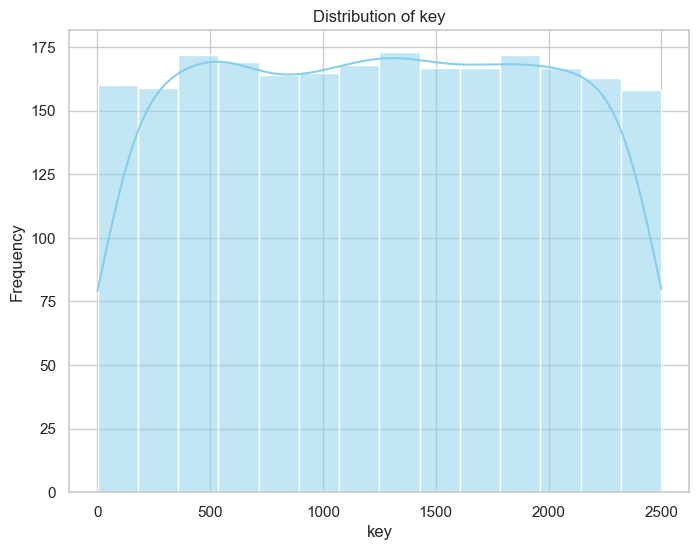

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


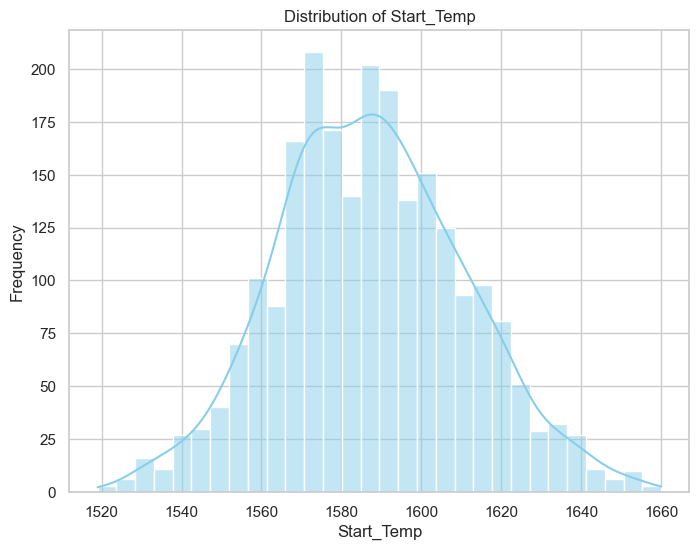

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


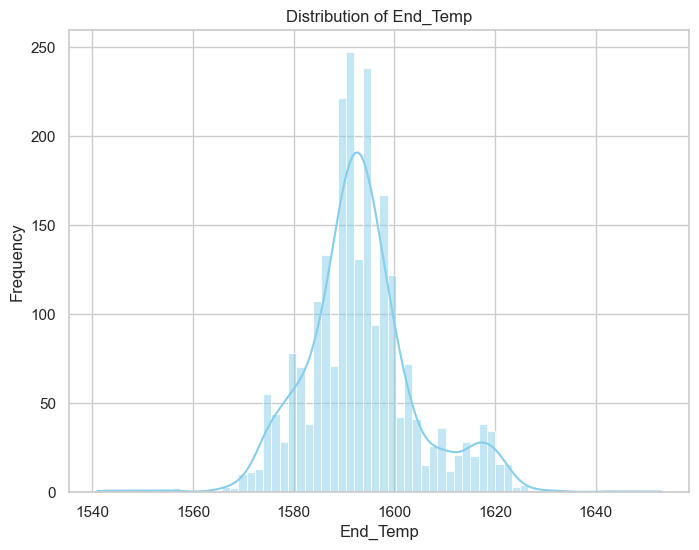

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


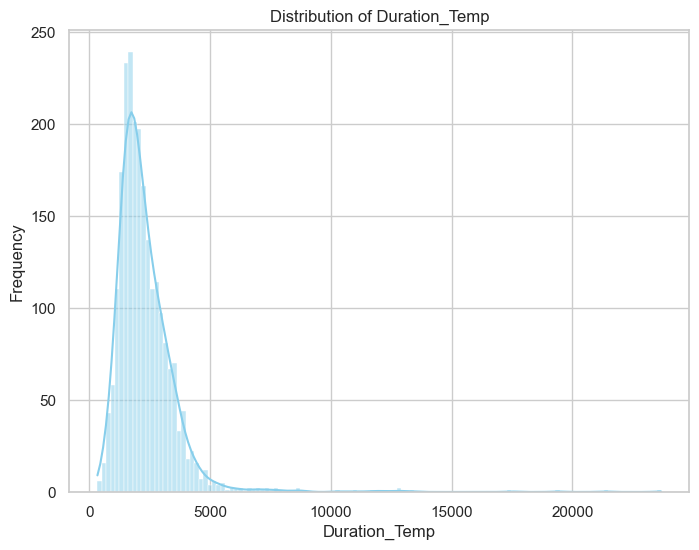

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


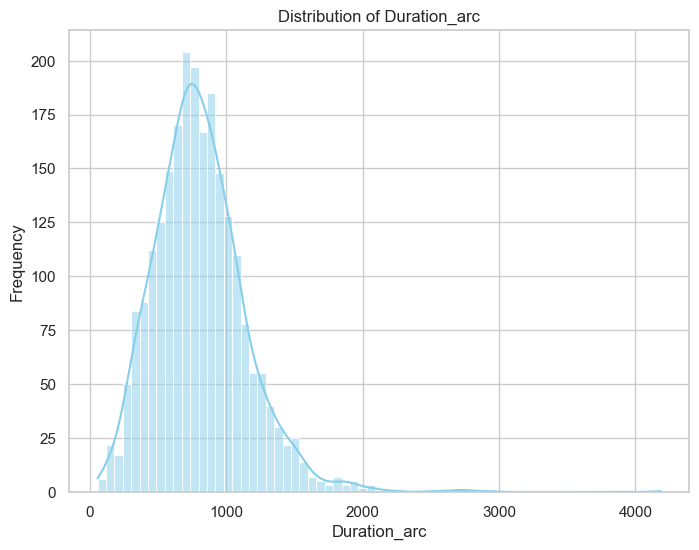

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


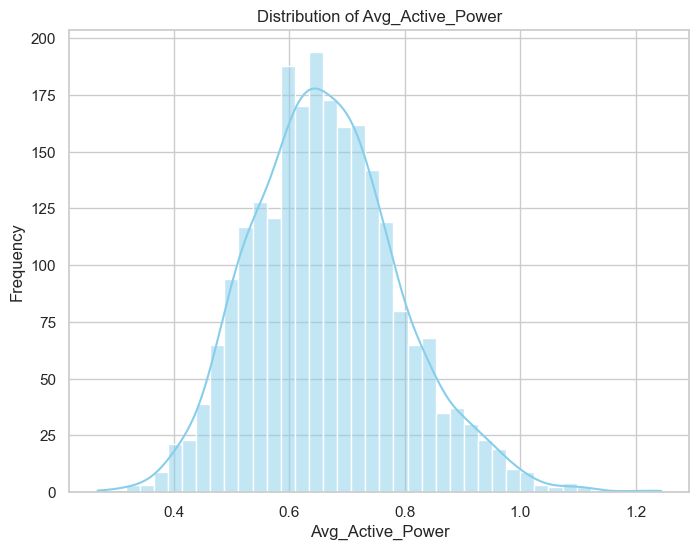

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


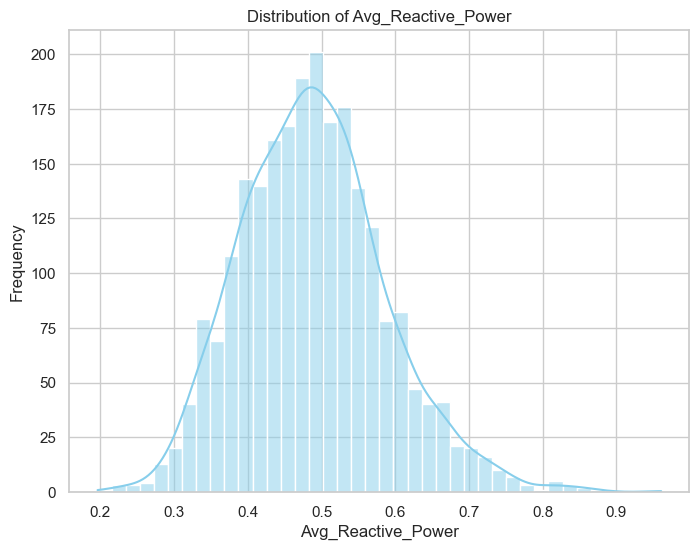

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


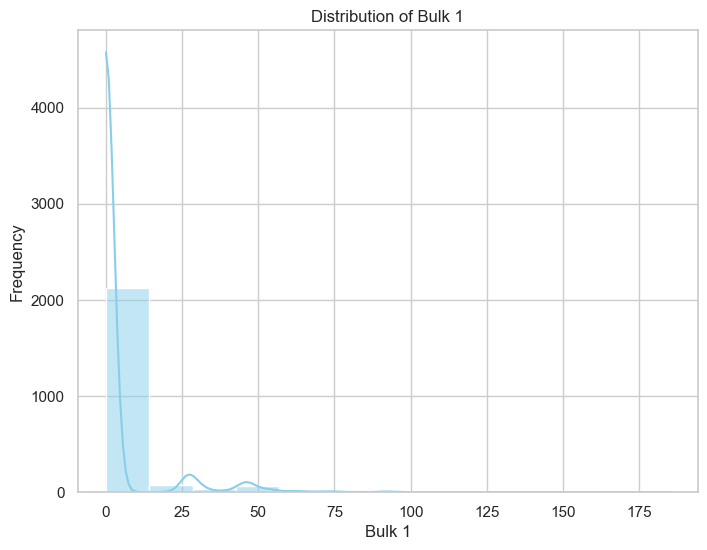

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


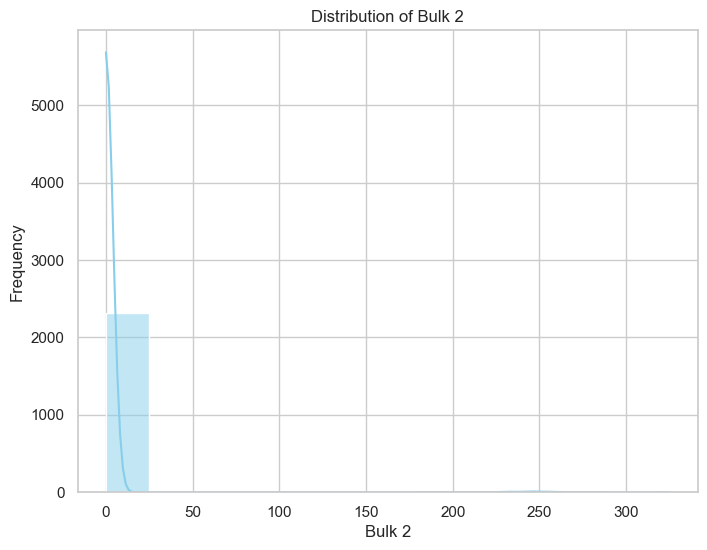

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


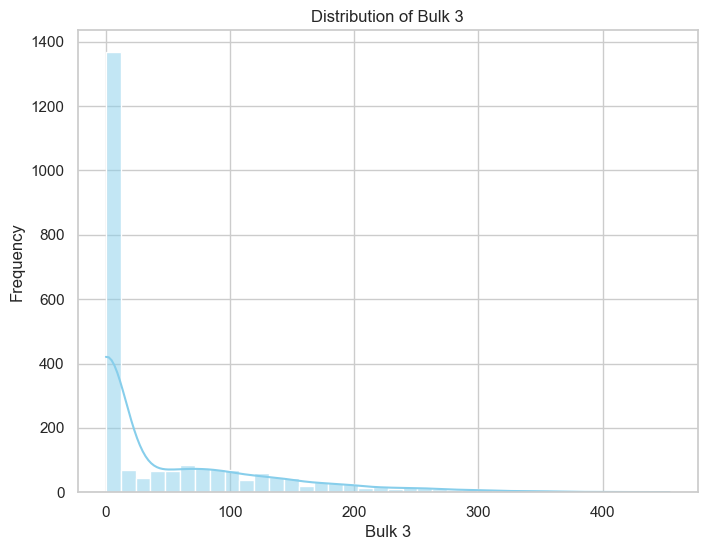

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


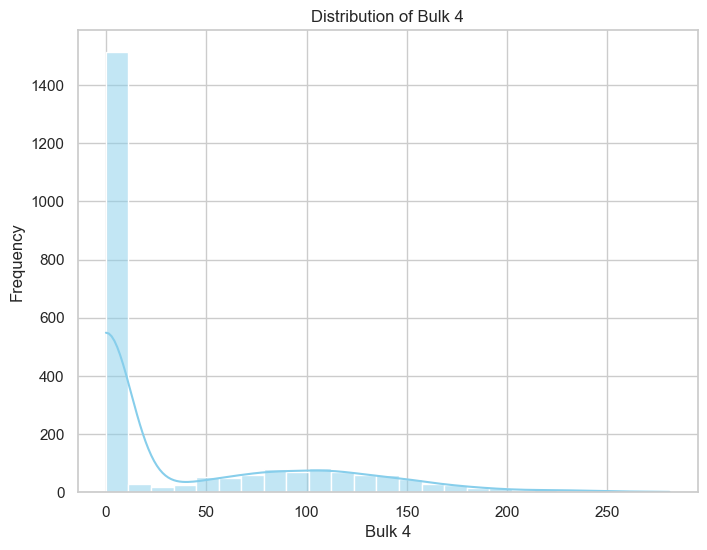

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


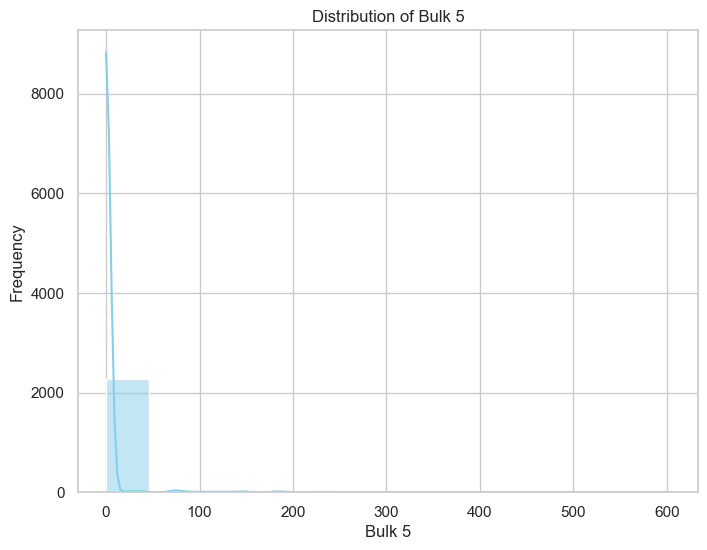

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


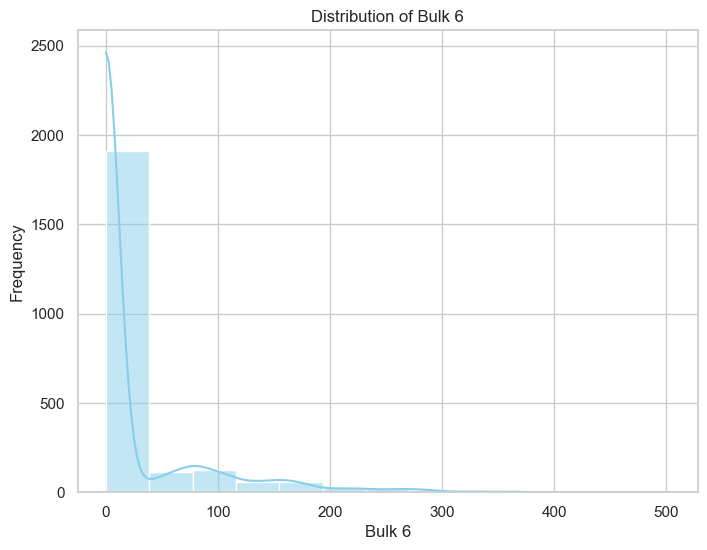

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


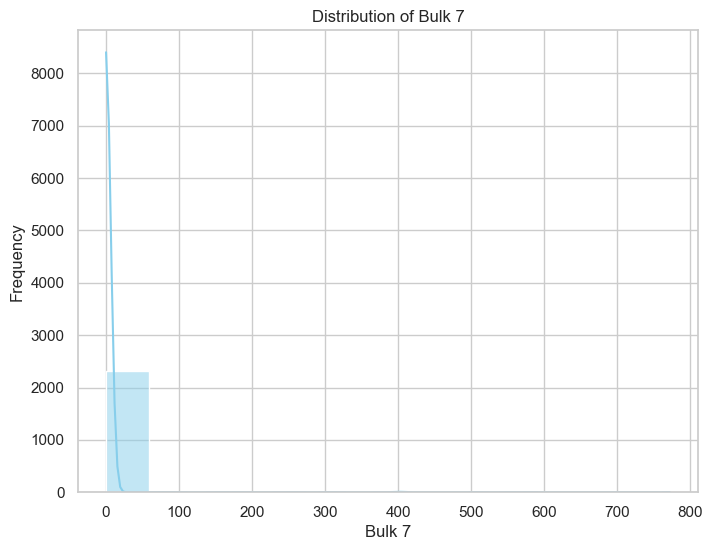

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


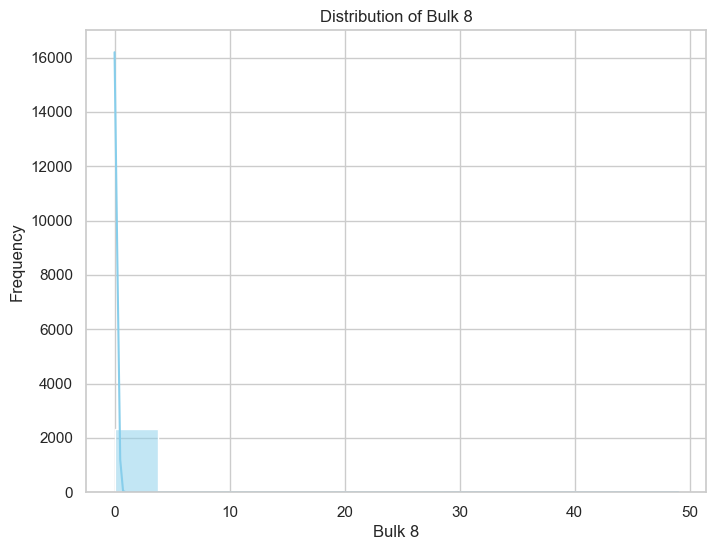

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


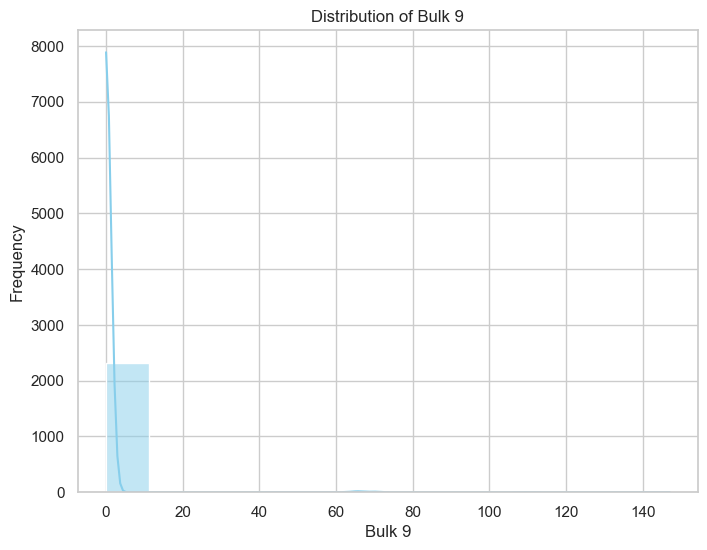

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


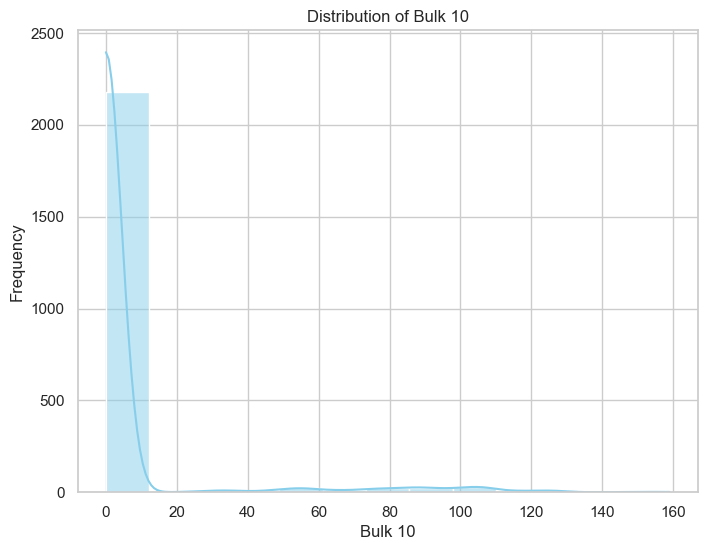

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


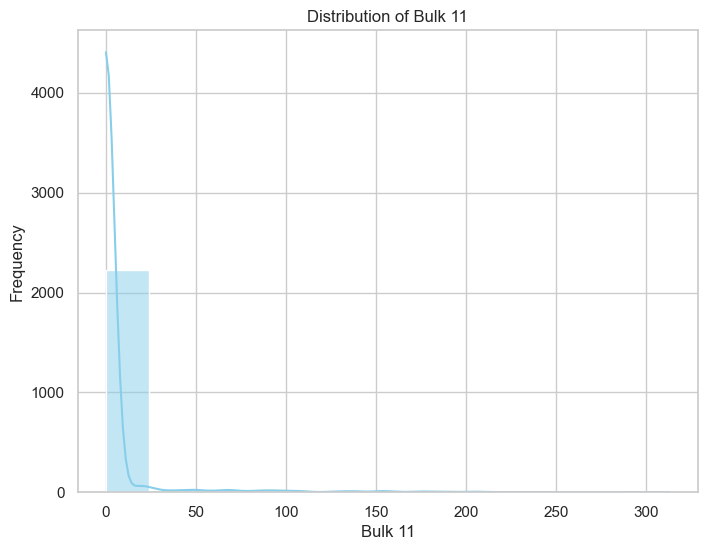

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


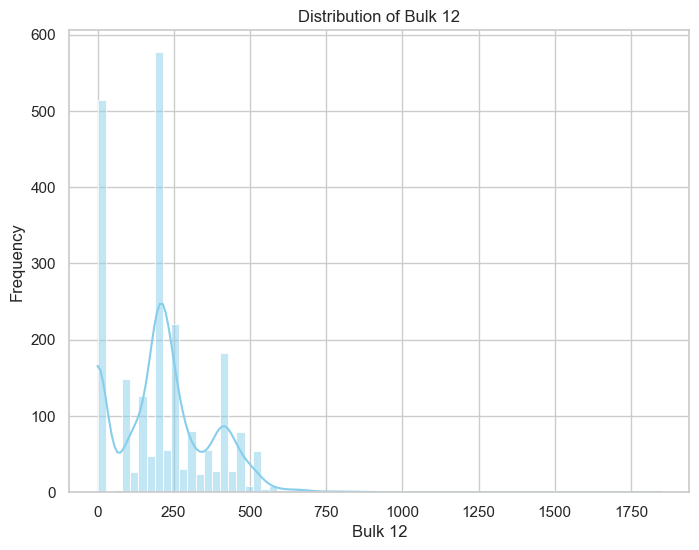

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


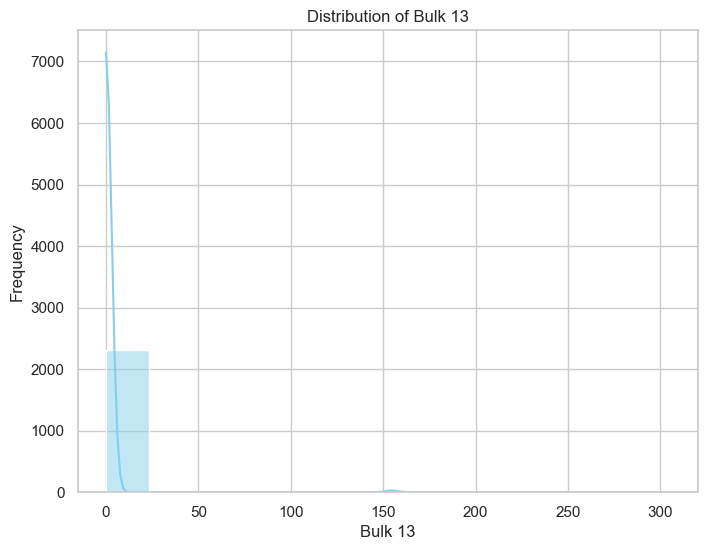

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


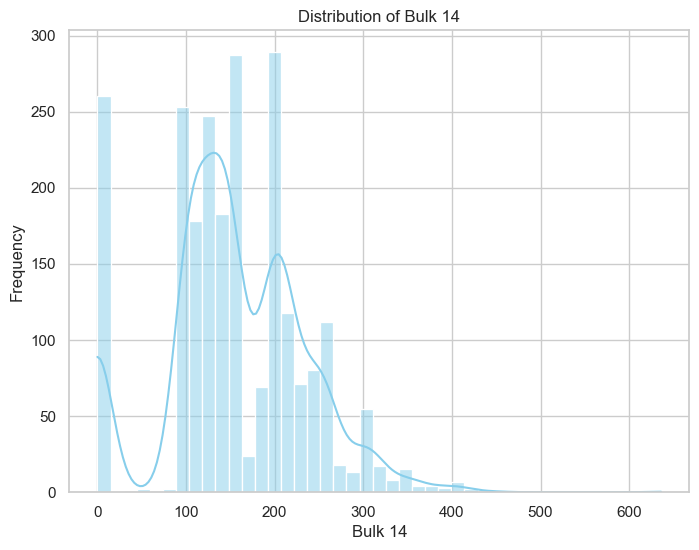

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


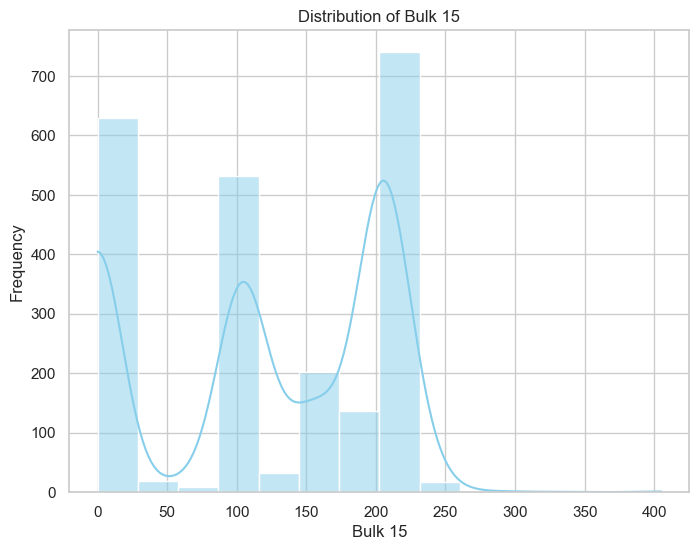

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


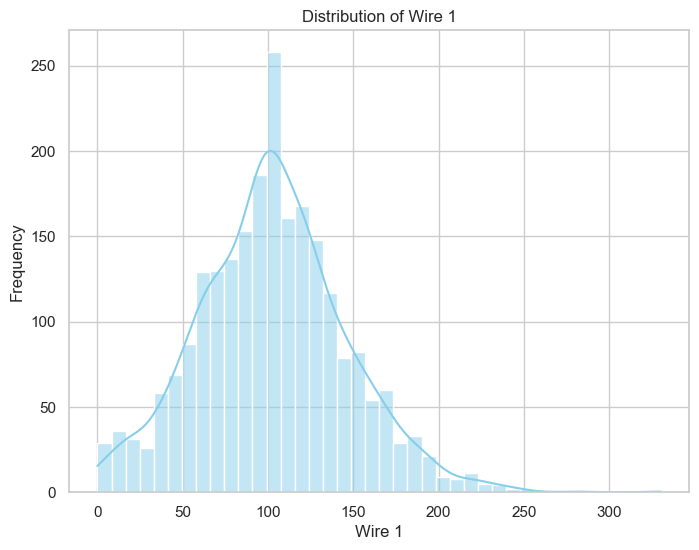

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


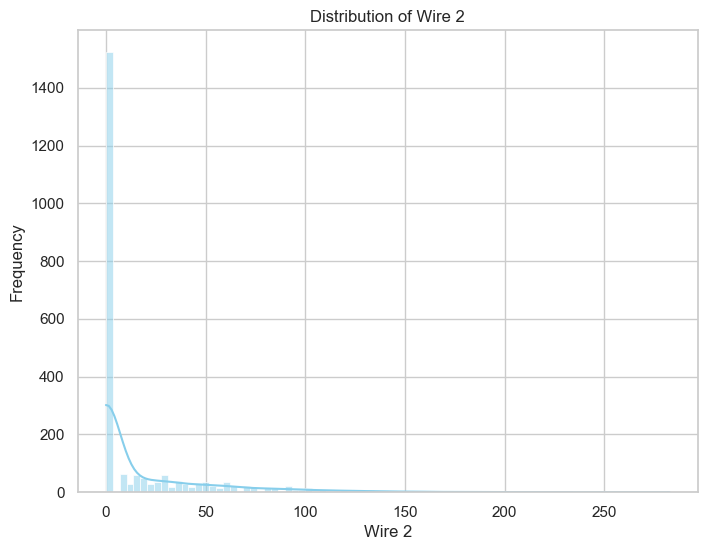

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


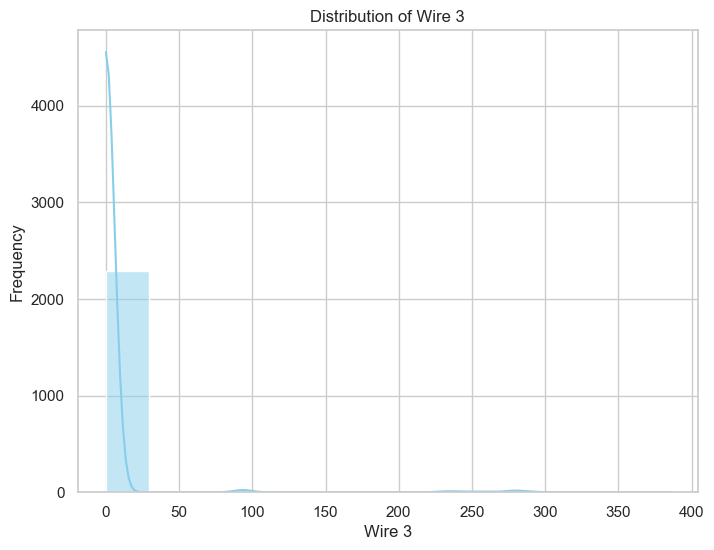

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


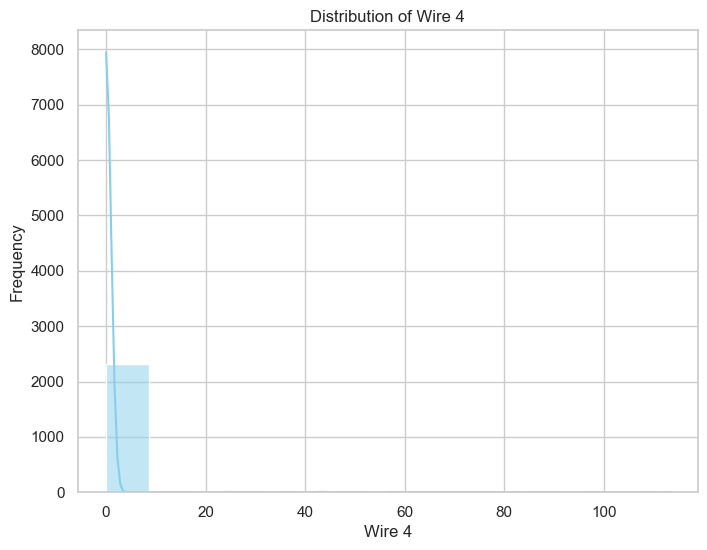

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


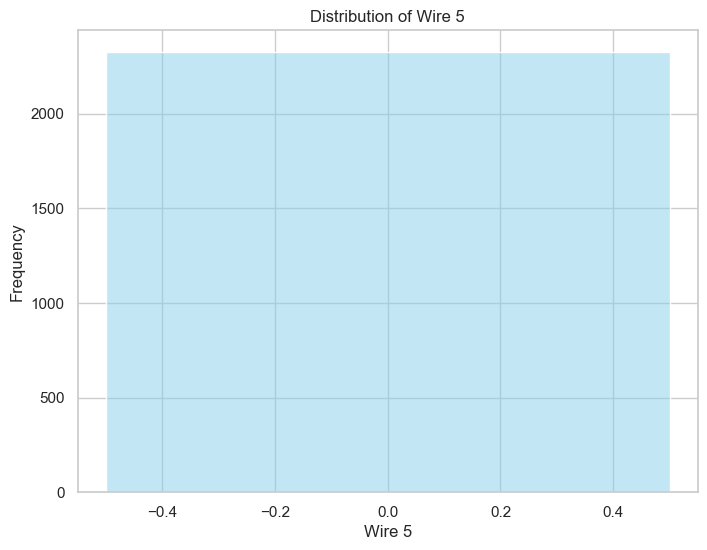

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


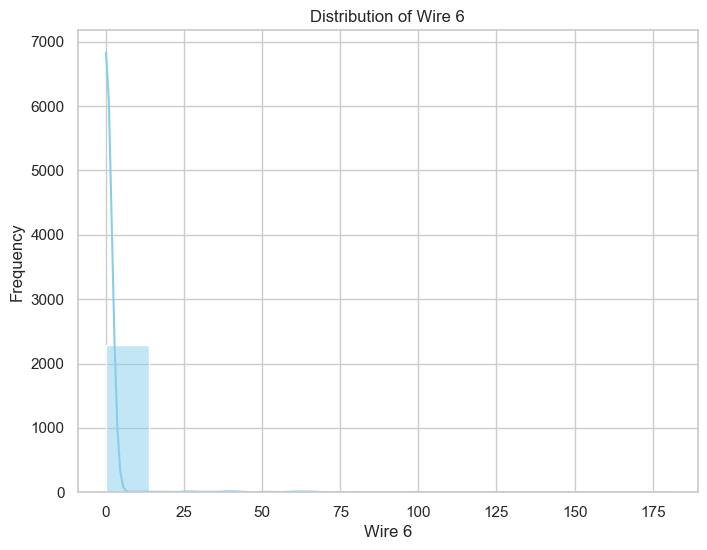

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


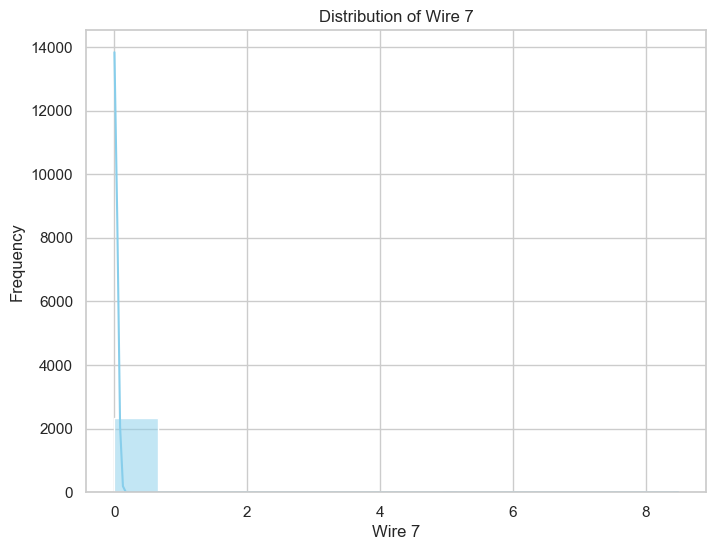

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


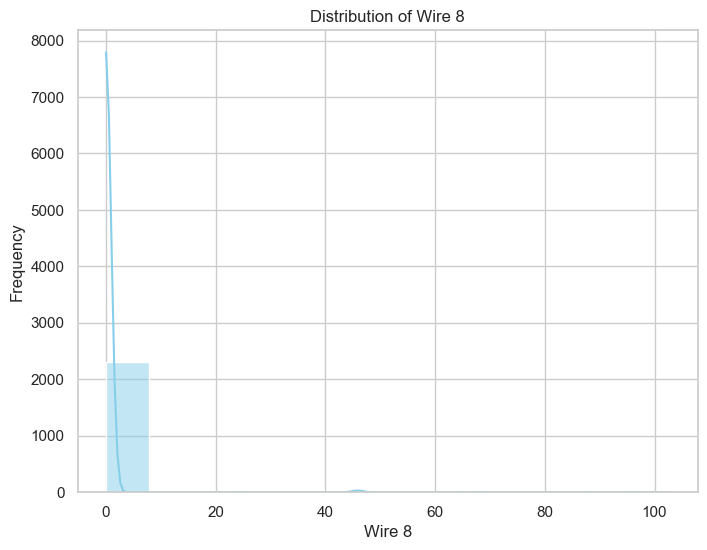

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


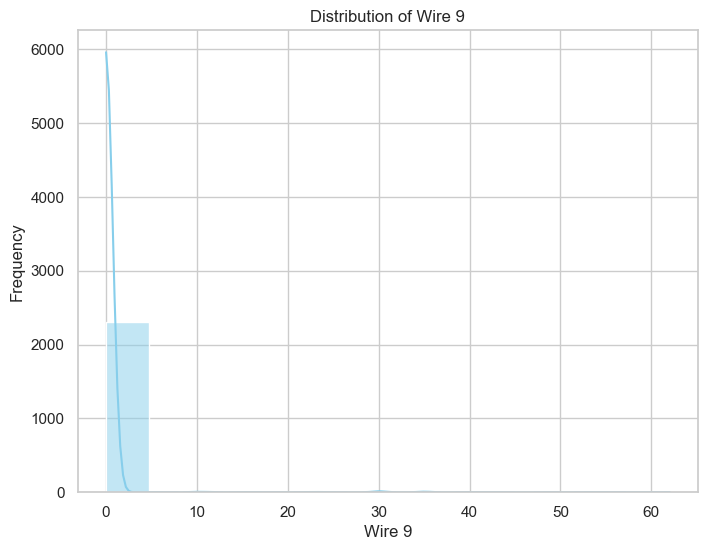

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


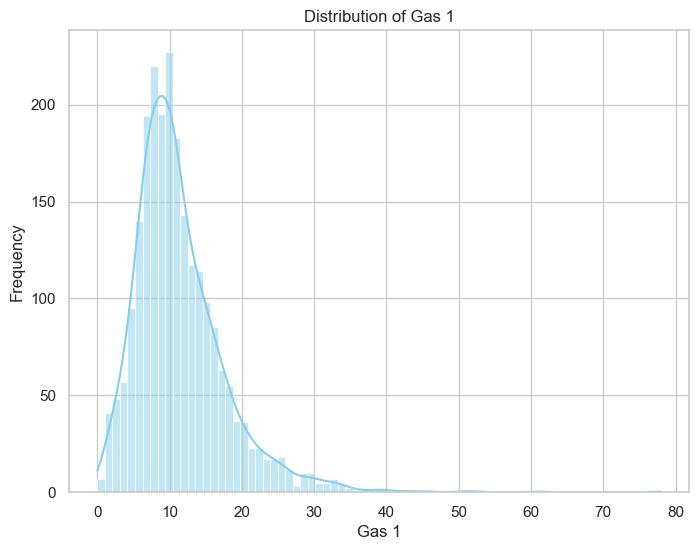

In [30]:
sns.set(style="whitegrid")

for column in merged_df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(merged_df[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Let's check the correlation between features.

/Users/daniyardjumaliev/Jupyter/venv/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


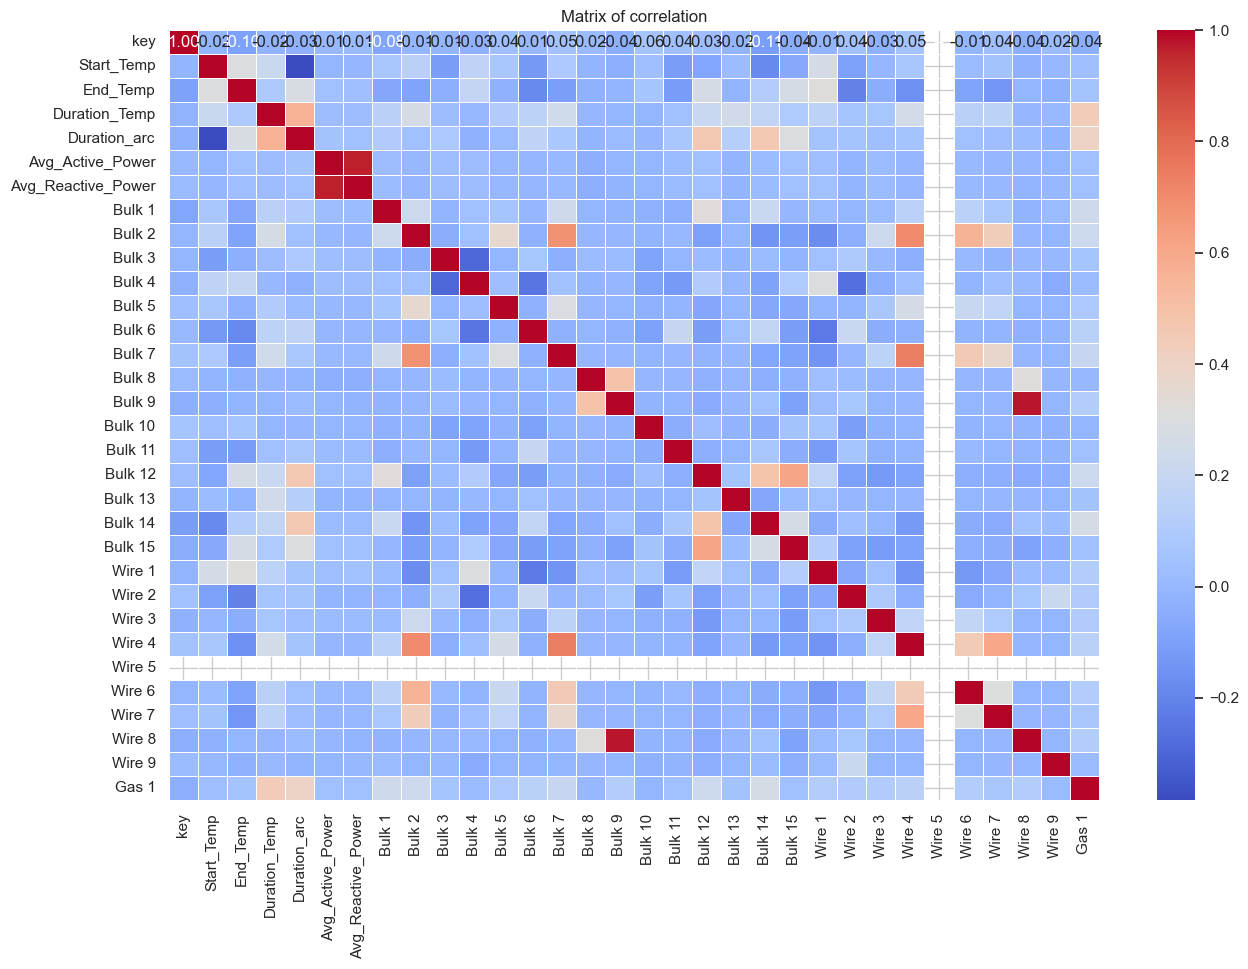

In [31]:
correlation_matrix = merged_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matrix of correlation")
plt.show()

Let's remove features that have strong correlations between them. Additionally, we'll remove 'key' as it is not useful for training.

In [32]:
merged_df = merged_df.drop(['Avg_Reactive_Power', 'Bulk 9', 'Wire 5', 'key'], axis=1)

_Conclusion_: All features with strong correlations were removed. The distribution of all features is normal.

## Data Preparation

In [33]:
target = merged_df['End_Temp']
features = merged_df.drop(['End_Temp'], axis=1)

display(target.shape)
display(features.shape)

(2324,)

(2324, 27)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=171123, shuffle=True)

print(f'Train features: {X_train.shape}')
print(f'Test features: {X_test.shape}')
print(f'Train target: {y_train.shape}')
print(f'Test target: {y_test.shape}')

Train features: (1743, 27)
Test features: (581, 27)
Train target: (1743,)
Test target: (581,)


_Conclusion_: The data has been divided into training and testing sets with a ratio of 80% and 20%, respectively, and scaled for future model training.

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'Train features: {X_train.shape}')
print(f'Test features: {X_test.shape}')

Train features: (1743, 27)
Test features: (581, 27)


_Conclusion_: The data has been split into training and testing sets in a ratio of 80% and 20%, respectively, and scaled for future model training.

## Machine Learning Model Training

During the training phase, we will use three models:

- Linear Regression
- Random Forest
- CatBoost

Linear Regression

In [36]:
model_lr = LinearRegression()

cv_scores = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

cv_scores = -cv_scores

print(f'Average Cross-Validation Score (MAE): {cv_scores.mean()}')

Average Cross-Validation Score (MAE): 6.006024961125133


Random Forest

In [37]:
model_rf = RandomForestRegressor()

param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [1, 10, 20],
    'min_samples_split': [2, 12, 20],
    'min_samples_leaf': [1, 5, 10]
}

random_search_rf = RandomizedSearchCV(model_rf, param_distributions=param_dist_rf, n_iter=10, cv=5, random_state=171123, scoring='neg_mean_absolute_error')

for _ in tqdm(range(10), desc="RandomizedSearchCV"):
    random_search_rf.fit(X_train, y_train)

print("Best hyperparameters for Random Forest:", random_search_rf.best_params_)

best_mae = -random_search_rf.best_score_
print("Best MAE for the best hyperparameters:", best_mae)

RandomizedSearchCV: 100%|███████████████████████| 10/10 [08:48<00:00, 52.88s/it]

Best hyperparameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': 20}
Best MAE for the best hyperparameters: 6.1552803080155645


CatBoost

In [38]:
model_catboost = CatBoostRegressor()

param_dist_catboost = {
    'iterations': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

random_search_catboost = RandomizedSearchCV(model_catboost, param_distributions=param_dist_catboost, n_iter=10, cv=5, random_state=171123, scoring='neg_mean_absolute_error')

for _ in tqdm(range(10), desc="RandomizedSearchCV"):
    random_search_catboost.fit(X_train, y_train)

print("Best hyperparameters for CatBoost:", random_search_catboost.best_params_)

best_mae_catboost = -random_search_catboost.best_score_  
print("Best MAE for the best hyperparameters (CatBoost):", best_mae_catboost)

RandomizedSearchCV:   0%|                                | 0/10 [00:00<?, ?it/s]

0:	learn: 11.3012243	total: 64.5ms	remaining: 3.16s
1:	learn: 11.2709836	total: 66.4ms	remaining: 1.59s
2:	learn: 11.2417051	total: 67.7ms	remaining: 1.06s
3:	learn: 11.2130648	total: 69.1ms	remaining: 795ms
4:	learn: 11.1861463	total: 70.5ms	remaining: 634ms
5:	learn: 11.1554394	total: 71.9ms	remaining: 527ms
6:	learn: 11.1238991	total: 73.2ms	remaining: 450ms
7:	learn: 11.0976843	total: 74.9ms	remaining: 393ms
8:	learn: 11.0671808	total: 76.4ms	remaining: 348ms
9:	learn: 11.0394891	total: 77.7ms	remaining: 311ms
10:	learn: 11.0096104	total: 79.3ms	remaining: 281ms
11:	learn: 10.9805475	total: 80.6ms	remaining: 255ms
12:	learn: 10.9535091	total: 81.9ms	remaining: 233ms
13:	learn: 10.9287403	total: 83.2ms	remaining: 214ms
14:	learn: 10.9019080	total: 84.6ms	remaining: 197ms
15:	learn: 10.8789102	total: 85.9ms	remaining: 183ms
16:	learn: 10.8547960	total: 87.2ms	remaining: 169ms
17:	learn: 10.8283650	total: 88.5ms	remaining: 157ms
18:	learn: 10.8024818	total: 90ms	remaining: 147ms
19:	l

RandomizedSearchCV:  10%|██▍                     | 1/10 [00:11<01:45, 11.69s/it]

47:	learn: 6.3373102	total: 312ms	remaining: 13ms
48:	learn: 6.2986974	total: 321ms	remaining: 6.54ms
49:	learn: 6.2602326	total: 341ms	remaining: 0us
0:	learn: 11.3012243	total: 2.21ms	remaining: 108ms
1:	learn: 11.2709836	total: 4.53ms	remaining: 109ms
2:	learn: 11.2417051	total: 6.37ms	remaining: 99.8ms
3:	learn: 11.2130648	total: 8.13ms	remaining: 93.5ms
4:	learn: 11.1861463	total: 9.92ms	remaining: 89.3ms
5:	learn: 11.1554394	total: 12.1ms	remaining: 88.5ms
6:	learn: 11.1238991	total: 13.9ms	remaining: 85.7ms
7:	learn: 11.0976843	total: 15.9ms	remaining: 83.6ms
8:	learn: 11.0671808	total: 19.2ms	remaining: 87.4ms
9:	learn: 11.0394891	total: 21ms	remaining: 83.8ms
10:	learn: 11.0096104	total: 22.8ms	remaining: 80.9ms
11:	learn: 10.9805475	total: 25.8ms	remaining: 81.8ms
12:	learn: 10.9535091	total: 27.7ms	remaining: 78.8ms
13:	learn: 10.9287403	total: 30.1ms	remaining: 77.3ms
14:	learn: 10.9019080	total: 32.4ms	remaining: 75.5ms
15:	learn: 10.8789102	total: 35.8ms	remaining: 76.1ms

RandomizedSearchCV:  20%|████▊                   | 2/10 [00:22<01:28, 11.09s/it]

40:	learn: 6.6082016	total: 295ms	remaining: 64.8ms
41:	learn: 6.5663180	total: 302ms	remaining: 57.5ms
42:	learn: 6.5252320	total: 309ms	remaining: 50.2ms
43:	learn: 6.5075600	total: 316ms	remaining: 43.1ms
44:	learn: 6.4587774	total: 324ms	remaining: 36ms
45:	learn: 6.4103905	total: 330ms	remaining: 28.7ms
46:	learn: 6.3626338	total: 337ms	remaining: 21.5ms
47:	learn: 6.3373102	total: 343ms	remaining: 14.3ms
48:	learn: 6.2986974	total: 349ms	remaining: 7.12ms
49:	learn: 6.2602326	total: 355ms	remaining: 0us
0:	learn: 11.3012243	total: 1.78ms	remaining: 87.5ms
1:	learn: 11.2709836	total: 3.29ms	remaining: 78.9ms
2:	learn: 11.2417051	total: 4.85ms	remaining: 76ms
3:	learn: 11.2130648	total: 6.5ms	remaining: 74.7ms
4:	learn: 11.1861463	total: 8.15ms	remaining: 73.4ms
5:	learn: 11.1554394	total: 19.8ms	remaining: 145ms
6:	learn: 11.1238991	total: 29.7ms	remaining: 182ms
7:	learn: 11.0976843	total: 34.4ms	remaining: 181ms
8:	learn: 11.0671808	total: 35.9ms	remaining: 164ms
9:	learn: 11.03

RandomizedSearchCV:  30%|███████▏                | 3/10 [00:33<01:16, 10.99s/it]

49:	learn: 6.2602326	total: 335ms	remaining: 0us
0:	learn: 11.3012243	total: 2.4ms	remaining: 118ms
1:	learn: 11.2709836	total: 4.17ms	remaining: 100ms
2:	learn: 11.2417051	total: 6.23ms	remaining: 97.6ms
3:	learn: 11.2130648	total: 8.48ms	remaining: 97.6ms
4:	learn: 11.1861463	total: 10.4ms	remaining: 93.4ms
5:	learn: 11.1554394	total: 12.2ms	remaining: 89.3ms
6:	learn: 11.1238991	total: 13.9ms	remaining: 85.4ms
7:	learn: 11.0976843	total: 15.6ms	remaining: 82ms
8:	learn: 11.0671808	total: 17.3ms	remaining: 78.8ms
9:	learn: 11.0394891	total: 18.9ms	remaining: 75.7ms
10:	learn: 11.0096104	total: 20.9ms	remaining: 74ms
11:	learn: 10.9805475	total: 23.3ms	remaining: 73.7ms
12:	learn: 10.9535091	total: 25.3ms	remaining: 71.9ms
13:	learn: 10.9287403	total: 27ms	remaining: 69.5ms
14:	learn: 10.9019080	total: 28.8ms	remaining: 67.2ms
15:	learn: 10.8789102	total: 30.6ms	remaining: 64.9ms
16:	learn: 10.8547960	total: 32.3ms	remaining: 62.7ms
17:	learn: 10.8283650	total: 34ms	remaining: 60.5ms


RandomizedSearchCV:  40%|█████████▌              | 4/10 [00:43<01:04, 10.78s/it]

31:	learn: 7.0330731	total: 208ms	remaining: 117ms
32:	learn: 6.9963443	total: 215ms	remaining: 111ms
33:	learn: 6.9263579	total: 221ms	remaining: 104ms
34:	learn: 6.8708780	total: 227ms	remaining: 97.4ms
35:	learn: 6.8234824	total: 233ms	remaining: 90.5ms
36:	learn: 6.7743726	total: 239ms	remaining: 83.8ms
37:	learn: 6.7466122	total: 245ms	remaining: 77.4ms
38:	learn: 6.7154440	total: 250ms	remaining: 70.6ms
39:	learn: 6.6664833	total: 256ms	remaining: 64ms
40:	learn: 6.6082016	total: 263ms	remaining: 57.7ms
41:	learn: 6.5663180	total: 268ms	remaining: 51.1ms
42:	learn: 6.5252320	total: 274ms	remaining: 44.5ms
43:	learn: 6.5075600	total: 280ms	remaining: 38.1ms
44:	learn: 6.4587774	total: 285ms	remaining: 31.7ms
45:	learn: 6.4103905	total: 291ms	remaining: 25.3ms
46:	learn: 6.3626338	total: 298ms	remaining: 19ms
47:	learn: 6.3373102	total: 304ms	remaining: 12.7ms
48:	learn: 6.2986974	total: 311ms	remaining: 6.35ms
49:	learn: 6.2602326	total: 317ms	remaining: 0us
0:	learn: 11.3012243	t

RandomizedSearchCV:  50%|████████████            | 5/10 [00:54<00:53, 10.64s/it]

18:	learn: 7.8516206	total: 119ms	remaining: 195ms
19:	learn: 7.7525578	total: 126ms	remaining: 189ms
20:	learn: 7.6788402	total: 132ms	remaining: 183ms
21:	learn: 7.5934452	total: 137ms	remaining: 175ms
22:	learn: 7.5115340	total: 143ms	remaining: 168ms
23:	learn: 7.4610290	total: 148ms	remaining: 161ms
24:	learn: 7.4036645	total: 153ms	remaining: 153ms
25:	learn: 7.3343944	total: 159ms	remaining: 147ms
26:	learn: 7.2718776	total: 164ms	remaining: 140ms
27:	learn: 7.2241813	total: 169ms	remaining: 133ms
28:	learn: 7.1814098	total: 174ms	remaining: 126ms
29:	learn: 7.1382709	total: 179ms	remaining: 119ms
30:	learn: 7.0811058	total: 183ms	remaining: 112ms
31:	learn: 7.0330731	total: 188ms	remaining: 106ms
32:	learn: 6.9963443	total: 193ms	remaining: 99.4ms
33:	learn: 6.9263579	total: 203ms	remaining: 95.4ms
34:	learn: 6.8708780	total: 220ms	remaining: 94.1ms
35:	learn: 6.8234824	total: 225ms	remaining: 87.4ms
36:	learn: 6.7743726	total: 232ms	remaining: 81.7ms
37:	learn: 6.7466122	total

RandomizedSearchCV:  60%|██████████████▍         | 6/10 [01:03<00:40, 10.21s/it]

36:	learn: 6.7743726	total: 202ms	remaining: 71ms
37:	learn: 6.7466122	total: 208ms	remaining: 65.7ms
38:	learn: 6.7154440	total: 213ms	remaining: 60.1ms
39:	learn: 6.6664833	total: 217ms	remaining: 54.4ms
40:	learn: 6.6082016	total: 222ms	remaining: 48.7ms
41:	learn: 6.5663180	total: 226ms	remaining: 43.1ms
42:	learn: 6.5252320	total: 231ms	remaining: 37.6ms
43:	learn: 6.5075600	total: 235ms	remaining: 32.1ms
44:	learn: 6.4587774	total: 240ms	remaining: 26.6ms
45:	learn: 6.4103905	total: 244ms	remaining: 21.2ms
46:	learn: 6.3626338	total: 249ms	remaining: 15.9ms
47:	learn: 6.3373102	total: 253ms	remaining: 10.5ms
48:	learn: 6.2986974	total: 257ms	remaining: 5.25ms
49:	learn: 6.2602326	total: 262ms	remaining: 0us
0:	learn: 11.3012243	total: 4.86ms	remaining: 238ms
1:	learn: 11.2709836	total: 6.37ms	remaining: 153ms
2:	learn: 11.2417051	total: 8.14ms	remaining: 128ms
3:	learn: 11.2130648	total: 9.91ms	remaining: 114ms
4:	learn: 11.1861463	total: 11.4ms	remaining: 102ms
5:	learn: 11.1554

RandomizedSearchCV:  70%|████████████████▊       | 7/10 [01:13<00:30, 10.04s/it]

32:	learn: 6.9963443	total: 207ms	remaining: 106ms
33:	learn: 6.9263579	total: 213ms	remaining: 100ms
34:	learn: 6.8708780	total: 218ms	remaining: 93.6ms
35:	learn: 6.8234824	total: 225ms	remaining: 87.6ms
36:	learn: 6.7743726	total: 231ms	remaining: 81.1ms
37:	learn: 6.7466122	total: 236ms	remaining: 74.6ms
38:	learn: 6.7154440	total: 241ms	remaining: 67.9ms
39:	learn: 6.6664833	total: 246ms	remaining: 61.6ms
40:	learn: 6.6082016	total: 251ms	remaining: 55.2ms
41:	learn: 6.5663180	total: 256ms	remaining: 48.7ms
42:	learn: 6.5252320	total: 260ms	remaining: 42.4ms
43:	learn: 6.5075600	total: 265ms	remaining: 36.1ms
44:	learn: 6.4587774	total: 269ms	remaining: 29.9ms
45:	learn: 6.4103905	total: 274ms	remaining: 23.8ms
46:	learn: 6.3626338	total: 279ms	remaining: 17.8ms
47:	learn: 6.3373102	total: 283ms	remaining: 11.8ms
48:	learn: 6.2986974	total: 288ms	remaining: 5.88ms
49:	learn: 6.2602326	total: 305ms	remaining: 0us
0:	learn: 11.3012243	total: 2.14ms	remaining: 105ms
1:	learn: 11.2709

RandomizedSearchCV:  80%|███████████████████▏    | 8/10 [01:22<00:19,  9.86s/it]

21:	learn: 7.5934452	total: 131ms	remaining: 167ms
22:	learn: 7.5115340	total: 137ms	remaining: 160ms
23:	learn: 7.4610290	total: 143ms	remaining: 155ms
24:	learn: 7.4036645	total: 153ms	remaining: 153ms
25:	learn: 7.3343944	total: 158ms	remaining: 146ms
26:	learn: 7.2718776	total: 162ms	remaining: 138ms
27:	learn: 7.2241813	total: 167ms	remaining: 131ms
28:	learn: 7.1814098	total: 171ms	remaining: 124ms
29:	learn: 7.1382709	total: 176ms	remaining: 117ms
30:	learn: 7.0811058	total: 181ms	remaining: 111ms
31:	learn: 7.0330731	total: 185ms	remaining: 104ms
32:	learn: 6.9963443	total: 190ms	remaining: 97.9ms
33:	learn: 6.9263579	total: 195ms	remaining: 91.6ms
34:	learn: 6.8708780	total: 200ms	remaining: 85.6ms
35:	learn: 6.8234824	total: 205ms	remaining: 79.8ms
36:	learn: 6.7743726	total: 210ms	remaining: 73.8ms
37:	learn: 6.7466122	total: 215ms	remaining: 67.8ms
38:	learn: 6.7154440	total: 219ms	remaining: 61.9ms
39:	learn: 6.6664833	total: 224ms	remaining: 56ms
40:	learn: 6.6082016	tota

RandomizedSearchCV:  90%|█████████████████████▌  | 9/10 [01:32<00:09,  9.76s/it]

43:	learn: 6.5075600	total: 297ms	remaining: 40.4ms
44:	learn: 6.4587774	total: 303ms	remaining: 33.7ms
45:	learn: 6.4103905	total: 314ms	remaining: 27.3ms
46:	learn: 6.3626338	total: 318ms	remaining: 20.3ms
47:	learn: 6.3373102	total: 323ms	remaining: 13.4ms
48:	learn: 6.2986974	total: 328ms	remaining: 6.69ms
49:	learn: 6.2602326	total: 333ms	remaining: 0us
0:	learn: 11.3012243	total: 1.52ms	remaining: 74.7ms
1:	learn: 11.2709836	total: 3.08ms	remaining: 74ms
2:	learn: 11.2417051	total: 4.53ms	remaining: 71ms
3:	learn: 11.2130648	total: 5.95ms	remaining: 68.4ms
4:	learn: 11.1861463	total: 7.49ms	remaining: 67.4ms
5:	learn: 11.1554394	total: 8.9ms	remaining: 65.3ms
6:	learn: 11.1238991	total: 10.3ms	remaining: 63.3ms
7:	learn: 11.0976843	total: 11.7ms	remaining: 61.5ms
8:	learn: 11.0671808	total: 13.2ms	remaining: 60.2ms
9:	learn: 11.0394891	total: 14.7ms	remaining: 58.7ms
10:	learn: 11.0096104	total: 16.1ms	remaining: 57.1ms
11:	learn: 10.9805475	total: 17.8ms	remaining: 56.2ms
12:	le

RandomizedSearchCV: 100%|███████████████████████| 10/10 [01:41<00:00,  9.61s/it]

18:	learn: 7.8516206	total: 113ms	remaining: 184ms
19:	learn: 7.7525578	total: 118ms	remaining: 176ms
20:	learn: 7.6788402	total: 122ms	remaining: 169ms
21:	learn: 7.5934452	total: 127ms	remaining: 161ms
22:	learn: 7.5115340	total: 131ms	remaining: 154ms
23:	learn: 7.4610290	total: 136ms	remaining: 147ms
24:	learn: 7.4036645	total: 141ms	remaining: 141ms
25:	learn: 7.3343944	total: 146ms	remaining: 135ms
26:	learn: 7.2718776	total: 151ms	remaining: 128ms
27:	learn: 7.2241813	total: 155ms	remaining: 122ms
28:	learn: 7.1814098	total: 160ms	remaining: 116ms
29:	learn: 7.1382709	total: 164ms	remaining: 109ms
30:	learn: 7.0811058	total: 169ms	remaining: 104ms
31:	learn: 7.0330731	total: 174ms	remaining: 98.1ms
32:	learn: 6.9963443	total: 179ms	remaining: 92.1ms
33:	learn: 6.9263579	total: 184ms	remaining: 86.4ms
34:	learn: 6.8708780	total: 189ms	remaining: 81ms
35:	learn: 6.8234824	total: 194ms	remaining: 75.3ms
36:	learn: 6.7743726	total: 198ms	remaining: 69.5ms
37:	learn: 6.7466122	total:

RandomizedSearchCV: 100%|███████████████████████| 10/10 [01:41<00:00, 10.14s/it]

Best hyperparameters for CatBoost: {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 50, 'depth': 8}
Best MAE for the best hyperparameters (CatBoost): 6.211698839005287


_Conclusion_: The Linear Regression model exhibited the best metric with a Mean Absolute Error (MAE) of 6.006024961125134. Now, it remains to see how the model performs on the test set.

## Choosing the Best Model

In [39]:
best_lr_model = LinearRegression()

best_lr_model.fit(X_train, y_train)

y_pred = best_lr_model.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred)
print("MAE on test data:", mae_test)

MAE on test data: 5.852023069273241


Now, let's see which features have a greater impact on the target variable.

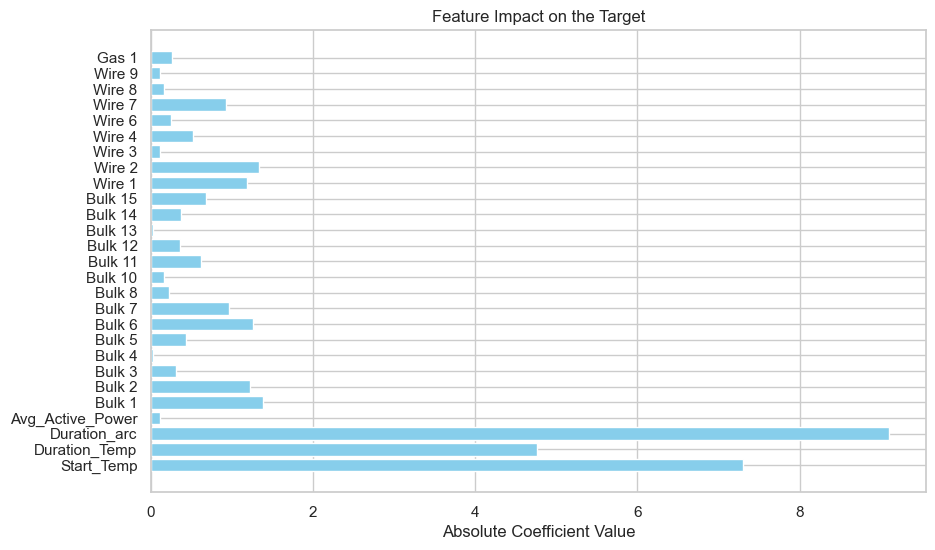

In [40]:
coefficients = best_lr_model.coef_

feature_indices = np.arange(len(coefficients))

feature_names = features.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, np.abs(coefficients), color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Impact on the Target')
plt.show()

_Conclusion_: The linear regression model performed well on the test set, demonstrating a good metric with a mean_absolute_error of 5.85202306927324. Additionally, on the "Feature Impact on the Target" graph, you can see which features have the greatest influence on predicting the target variable, "final temperature." Specifically, the total arc heating time (Duration_arc), total heating time (Duration_Temp), and "start temperature" (Start_Temp) have the most significant impact. Therefore, for model training, these three features are the most valuable.

The linear regression model has shown itself well in predicting the optimal temperature and can be recommended for implementation in production. It's also noteworthy that the most preferable features for its training are the total arc heating time, total heating time, and start temperature.

__GENERAL CONCLUSION__:

- At the initial stage, all necessary libraries and dataframes were loaded.
- The data_arc_new dataframe had a bucket with an obvious outlier at -715, which was bucket 2116, and it was removed.
    - For the dataframe with volumes of bulk materials, all missing values were replaced with 0.0. This is because the gaps in this dataframe result from not adding each of them at every stage of steel production.
    - Dataframes with the dates of adding bulk and wire materials were checked for date errors, and none were found.
    - In the target dataframe with temperatures, all buckets with at least one iteration of measurements with missing values were removed, as well as all buckets with temperatures registered below 1400, which is unacceptable for steelmaking.
    - For the dataframe with volumes of wire materials, all missing values were replaced with 0.0, similar to bulk materials.
- Next, all dataframes were merged into one for subsequent model training. It was decided to take the "initial" temperature and the "last" temperature for each bucket, with the last one becoming our target feature. All dataframes were aggregated based on the 'key' column. The values of active and reactive power were taken as the mean per bucket; later, it was decided to discard reactive power due to high correlation between active and reactive power, leaving only the mean per active power.
- During the analysis, it was decided, as mentioned above, to abandon the average reactive power, bulk material 9, wire material 5, and the bucket number, as it would not be useful for training.
- Then the data were divided into training and test samples, scaled for the convenience of model training.
- Three models were trained - linear regression, random forest, and CatBoost gradient descent model. The linear regression model showed the lowest metric of mean absolute error (MAE) - 6.006024961125134. On the test set, the model demonstrated an acceptable metric of 5.85202306927324.
- It was found that the most influential features on the target are the following: total arc heating time, total heating time, and start temperature.

__The linear regression model performed well in predicting the optimal temperature with an acceptable MAE metric of 5.85202306927324 and can be recommended for implementation in production.__